# Processing Big Data (7CS516)

## Masters in Big Data Analytics (100693787)

### Annual Sales Revenue Prediction

### Platform Simulation: AWS

### Introduction

**Precisely forecasting sales revenue is a pivotal element in the strategic planning of any business, exerting substantial influence over various critical areas and facilitating effective operational management. The comprehensive analysis and anticipation of sales revenue hold significant implications for diverse aspects of a company's functions.
The accurate projection of sales revenue assumes a central role in the operational success of any business, influencing pivotal areas and fostering effective planning. The comprehensive analysis and prediction of sales revenue carry wide-ranging implications for various facets of a company's operations. The ensuing points elucidate the business areas deriving benefits from precise sales revenue analysis and prediction:**


1. **CASH FLOW**: 

Possessing knowledge about expected sales confers a strategic advantage in efficiently managing cash flow. Businesses experiencing fluctuations in sales throughout the year can proactively plan by earmarking funds during peak seasons to cover expenses during slower periods. This proactive approach mitigates cash shortages, ensuring timely payment of bills and taxes, and thereby fostering positive relationships with vendors and employees.


2. **CREDIT**: 

Having sufficient funds to meet financial obligations diminishes reliance on borrowing. Anticipating credit needs in advance empowers a business to negotiate more favorable credit terms. Timely payments contribute to maintaining a robust credit rating, ultimately resulting in reduced borrowing costs.


3. **INVENTORY CONTROL**: 

Accurate sales forecasting empowers companies to exercise better control over their inventory. By estimating short-term sales, the risk of overstocking is minimized, leading to savings on carrying costs and product storage expenses. Furthermore, precise sales predictions mitigate the possibility of inventory shortages, contributing to higher customer satisfaction as products remain readily available for purchase. Additionally, accurate projections decrease the need for sudden product discounts aimed at reducing inventory levels.


4. **RESOURCE SUPPLIES**: 

Sales revenue predictions significantly benefit the supply chain by enabling just-in-time ordering of resources based on projected demand. This approach minimizes carrying costs while allowing the purchasing department to accurately schedule material deliveries in line with estimated demand. It also provides flexibility to take advantage of favorable pricing deals and allows for appropriate lead time when acquiring challenging-to-obtain materials.


5. **PRODUCTION SCHEDULING**: 

Sales revenue predictions play a crucial role in effective production scheduling. With insights into expected demand levels, the production department can make informed decisions regarding the timing and location of manufacturing operations, thereby minimizing bottlenecks and downtime.


6. **MARKETING**: 

Sales and marketing are closely intertwined, and accurate sales revenue forecasts provide valuable guidance to the marketing team. By aligning marketing efforts with periods of expected higher sales revenue, businesses can allocate resources more effectively. During slower periods, lower-cost marketing strategies can be utilized. Additionally, promotional offers and discounts can be strategically timed based on sales predictions.


7. **STAFFING DECISIONS**: 

Sales predictions serve as a foundation for determining staffing needs. Sales managers leverage projected revenue growth to justify hiring additional staff. Increased sales volume also necessitates additional manpower in production and other departments. For businesses with seasonal fluctuations, sales predictions assist in determining the duration and timing of temporary hires, allowing adequate time for training new employees.


8. **PRODUCT AND PRICE PLANNING**: 

Companies offering a variety of products or services can derive substantial benefits from detailed sales revenue predictions. These predictions aid in identifying top-selling items and evaluating the effectiveness of pricing strategies. If a product demonstrates high projected unit sales but low revenue or profit, price adjustments can be made. Sales teams, with their direct customer interactions, provide valuable insights into customer preferences and their willingness to pay. These insights can guide future sales estimates and be shared with other departments to optimize product offerings.


9. **SALES PROCESS**: 

Sales revenue predictions play a pivotal role in evaluating and optimizing the sales process. By tracking and analyzing sales data, businesses can identify areas requiring improvement or streamlining. Inefficient or redundant steps can be eliminated, and successful tactics can be identified and replicated for better results. Aligning sales quotas, compensation plans, and even territorial realignment with the projected sales revenue provides strategic guidance to each sales team.
Accurately predicting future sales revenue extends its importance beyond a singular business area, serving as a foundational element for decision-making across the organization and contributing significantly to sustained growth and overall success.

#### Steps

1. Gathering the data
2. Exploring the data
3. Preprocessing the data
4. Building a Model

#### Data Gathering

**Data Overview**:
The dataset comprises customer information of CompanyABC with relevant features and the target variable, Annual Sales. The data underwent preprocessing steps, including the selection of key numerical columns and handling of missing values.

### About Dataset Context

With growing demands and cut-throat competitions in the market, CompanyABC is seeking knowledge in understanding what works best for them. They would like to understand which product line, regions, categories and customer segments they should target or avoid which can help in predicticting their annual sales revenue.

In [1]:
# Import necessary PySpark modules
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.appName("Data Analysis").getOrCreate()

# Load the data into PySpark DataFrames
dim_account_df = spark.read.csv('DimAccount.csv', header=True)
dim_currency_df = spark.read.csv('DimCurrency.csv', header=True)
dim_customer_df = spark.read.csv('DimCustomer.csv', header=True)
dim_date_df = spark.read.csv('DimDate.csv', header=True)
dim_department_group_df = spark.read.csv('DimDepartmentGroup.csv', header=True)
dim_geography_df = spark.read.csv('DimGeography.csv', header=True)
dim_organization_df = spark.read.csv('DimOrganization.csv', header=True)
dim_product_df = spark.read.csv('DimProduct.csv', header=True)
dim_product_category_df = spark.read.csv('DimProductCategory.csv', header=True)
dim_product_subcategory_df = spark.read.csv('DimProductSubcategory.csv', header=True)
dim_promotion_df = spark.read.csv('DimPromotion.csv', header=True)
dim_reseller_df = spark.read.csv('DimReseller.csv', header=True)
dim_sales_reason_df = spark.read.csv('DimSalesReason.csv', header=True)
dim_sales_territory_df = spark.read.csv('DimSalesTerritory.csv', header=True)
dim_scenario_df = spark.read.csv('DimScenario.csv', header=True)
fact_call_center_df = spark.read.csv('FactCallCenter.csv', header=True)
fact_currency_rate_df = spark.read.csv('FactCurrencyRate.csv', header=True)
fact_finance_df = spark.read.csv('FactFinance.csv', header=True)
fact_internet_sales_df = spark.read.csv('FactInternetSales.csv', header=True)
fact_sales_targets_df = spark.read.csv('FactSalesTargets.csv', header=True)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


24/01/17 22:35:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
dim_customer_df.show()

24/01/17 22:36:03 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+--------------------+------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|NameStyle| BirthDate|MaritalStatus|Suffix|Gender|        EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|    SpanishEducation|FrenchEducation|EnglishOccupation|   SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|        AddressLine1|AddressLine2|             

In [3]:
# Get the number of rows
num_rows = dim_customer_df.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(dim_customer_df.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 18484
Number of Columns: 29


In [4]:
dim_customer_df.printSchema()

root
 |-- CustomerKey: string (nullable = true)
 |-- GeographyKey: string (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: string (nullable = true)
 |-- BirthDate: string (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Suffix: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: string (nullable = true)
 |-- TotalChildren: string (nullable = true)
 |-- NumberChildrenAtHome: string (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwnerFlag

In [5]:
# Count total missing values in the entire DataFrame
customer_total_missing_values = dim_customer_df.select([col(column).isNull().cast("int").alias(column) for column in dim_customer_df.columns])\
    .groupBy().sum().show()

# Display the total missing values
customer_total_missing_values

+----------------+-----------------+-------------------------+----------+--------------+---------------+-------------+--------------+--------------+------------------+-----------+-----------+-----------------+-----------------+------------------+-------------------------+---------------------+---------------------+--------------------+----------------------+----------------------+---------------------+-------------------+--------------------+-----------------+-----------------+----------+----------------------+--------------------+
|sum(CustomerKey)|sum(GeographyKey)|sum(CustomerAlternateKey)|sum(Title)|sum(FirstName)|sum(MiddleName)|sum(LastName)|sum(NameStyle)|sum(BirthDate)|sum(MaritalStatus)|sum(Suffix)|sum(Gender)|sum(EmailAddress)|sum(YearlyIncome)|sum(TotalChildren)|sum(NumberChildrenAtHome)|sum(EnglishEducation)|sum(SpanishEducation)|sum(FrenchEducation)|sum(EnglishOccupation)|sum(SpanishOccupation)|sum(FrenchOccupation)|sum(HouseOwnerFlag)|sum(NumberCarsOwned)|sum(AddressLine1

In [6]:
# Handle missing values
# Drop columns with more than 20 percent of missing values
threshold_percentage = 0.2
columns_to_drop = [column for column in dim_customer_df.columns if (dim_customer_df.where(col(column).isNull()).count() / dim_customer_df.count()) > threshold_percentage]
new_dim_customer_df = dim_customer_df.drop(*columns_to_drop)

In [7]:
# Count total missing values in the entire DataFrame
new_customer_total_missing_values = new_dim_customer_df.select([col(column).isNull().cast("int").alias(column) for column in new_dim_customer_df.columns])\
    .groupBy().sum().show()

# Display the total missing values (Check if the missing values were handled)
new_customer_total_missing_values

+----------------+-----------------+-------------------------+--------------+-------------+--------------+--------------+------------------+-----------+-----------------+-----------------+------------------+-------------------------+---------------------+---------------------+--------------------+----------------------+----------------------+---------------------+-------------------+--------------------+-----------------+----------+----------------------+--------------------+
|sum(CustomerKey)|sum(GeographyKey)|sum(CustomerAlternateKey)|sum(FirstName)|sum(LastName)|sum(NameStyle)|sum(BirthDate)|sum(MaritalStatus)|sum(Gender)|sum(EmailAddress)|sum(YearlyIncome)|sum(TotalChildren)|sum(NumberChildrenAtHome)|sum(EnglishEducation)|sum(SpanishEducation)|sum(FrenchEducation)|sum(EnglishOccupation)|sum(SpanishOccupation)|sum(FrenchOccupation)|sum(HouseOwnerFlag)|sum(NumberCarsOwned)|sum(AddressLine1)|sum(Phone)|sum(DateFirstPurchase)|sum(CommuteDistance)|
+----------------+-----------------+--

In [8]:
# Get the number of rows
num_rows = new_dim_customer_df.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(new_dim_customer_df.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 18484
Number of Columns: 25


In [9]:
new_dim_customer_df.printSchema()

root
 |-- CustomerKey: string (nullable = true)
 |-- GeographyKey: string (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: string (nullable = true)
 |-- BirthDate: string (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: string (nullable = true)
 |-- TotalChildren: string (nullable = true)
 |-- NumberChildrenAtHome: string (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwnerFlag: string (nullable = true)
 |-- NumberCarsOwned: string (nullable = true)
 |-- AddressLine1: string (nullable = true)

In [10]:
new_dim_customer_df.show()

+-----------+------------+--------------------+---------+--------+---------+----------+-------------+------+--------------------+------------+-------------+--------------------+----------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+--------------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|FirstName|LastName|NameStyle| BirthDate|MaritalStatus|Gender|        EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|    SpanishEducation|FrenchEducation|EnglishOccupation|   SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|        AddressLine1|              Phone|DateFirstPurchase|CommuteDistance|
+-----------+------------+--------------------+---------+--------+---------+----------+-------------+------+--------------------+------------+-------------+--------------------+----------------+------------------

In [11]:
from pyspark.sql.functions import col

# Convert 'necessary' columns to a numerical data type
dim_customer_df1 = new_dim_customer_df.withColumn('CustomerKey', col('CustomerKey').cast('int'))
dim_customer_df1 = dim_customer_df1.withColumn('GeographyKey', col('GeographyKey').cast('int'))
dim_customer_df1 = dim_customer_df1.withColumn('YearlyIncome', col('YearlyIncome').cast('double'))
dim_customer_df1 = dim_customer_df1.withColumn('TotalChildren', col('TotalChildren').cast('int'))
dim_customer_df1 = dim_customer_df1.withColumn('NumberChildrenAtHome', col('NumberChildrenAtHome').cast('int'))
dim_customer_df1 = dim_customer_df1.withColumn('HouseOwnerFlag', col('HouseOwnerFlag').cast('int'))
dim_customer_df1 = dim_customer_df1.withColumn('NumberCarsOwned', col('NumberCarsOwned').cast('int'))

In [12]:
dim_customer_df1.printSchema()

root
 |-- CustomerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: string (nullable = true)
 |-- BirthDate: string (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: double (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwnerFlag: integer (nullable = true)
 |-- NumberCarsOwned: integer (nullable = true)
 |-- AddressLine1: string (nullable =

In [13]:
from pyspark.sql.functions import col, when

# Convert string column to boolean column
dim_customer_df1 = dim_customer_df1.withColumn('NameStyle', when(col('NameStyle') == 'True', True).otherwise(False))

In [14]:
from pyspark.sql.functions import col, to_date

# Convert string column to date column
dim_customer_df1 = dim_customer_df1.withColumn('DateFirstPurchase', to_date(col('DateFirstPurchase'), 'yyyy-MM-dd'))
dim_customer_df1 = dim_customer_df1.withColumn('BirthDate', to_date(col('BirthDate'), 'yyyy-MM-dd'))

In [15]:
dim_customer_df1.printSchema()

root
 |-- CustomerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: boolean (nullable = false)
 |-- BirthDate: date (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: double (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwnerFlag: integer (nullable = true)
 |-- NumberCarsOwned: integer (nullable = true)
 |-- AddressLine1: string (nullable =

In [16]:
# Get the number of rows
num_rows = dim_customer_df1.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(dim_customer_df1.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 18484
Number of Columns: 25


### Check for Outliers

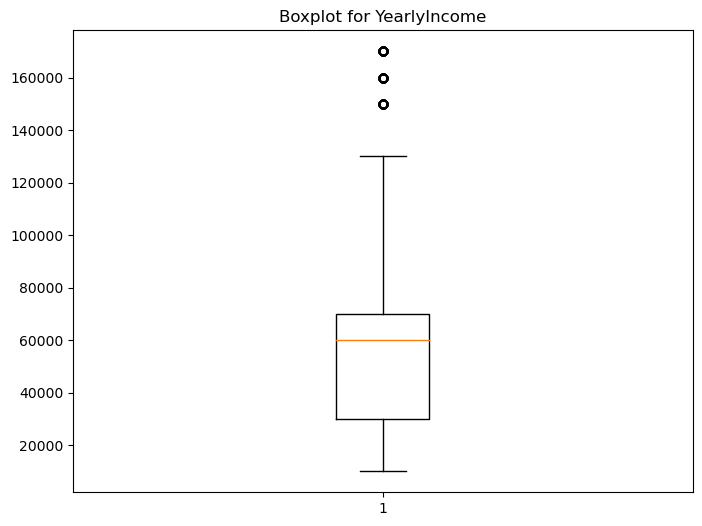

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Select the numerical column for which you want to create a boxplot
numerical_column = "YearlyIncome"

# Extract the numerical column as a PySpark DataFrame
df_spark = dim_customer_df1.select(col(numerical_column))

# Collect the numerical column as a list in the driver
values = [row[0] for row in df_spark.collect()]

# Create a boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(values)
plt.title(f'Boxplot for {numerical_column}')
plt.show()

In [18]:
# Handling outliers in the 'YearlyIncome' column

# Calculate the quartiles
Q1 = dim_customer_df1.approxQuantile('YearlyIncome', [0.25], 0.01)[0]
Q3 = dim_customer_df1.approxQuantile('YearlyIncome', [0.75], 0.01)[0]

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out the outliers
new_dim_customer_df1 = dim_customer_df1.filter((col('YearlyIncome') >= lower_bound) & (col('YearlyIncome') <= upper_bound))

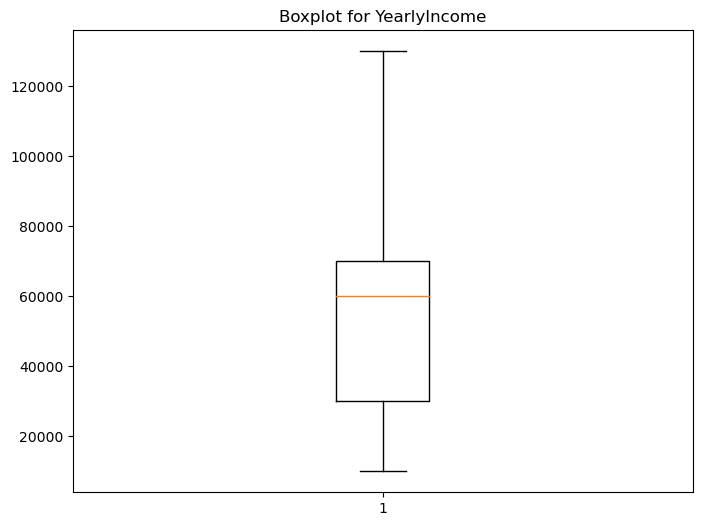

In [19]:
# Check if outliers were handled properly
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Select the numerical column for which you want to create a boxplot
numerical_column = "YearlyIncome"

# Extract the numerical column as a PySpark DataFrame
df_spark1 = new_dim_customer_df1.select(col(numerical_column))

# Collect the numerical column as a list in the driver
values1 = [row[0] for row in df_spark1.collect()]

# Create a boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(values1)
plt.title(f'Boxplot for {numerical_column}')
plt.show()

In [20]:
# Drop duplicate rows
new_dim_customer_df2 = new_dim_customer_df1.dropDuplicates()

In [21]:
# Get the number of rows
num_rows = new_dim_customer_df2.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(new_dim_customer_df2.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 18175
Number of Columns: 25


In [22]:
new_dim_customer_df2.show()

+-----------+------------+--------------------+---------+----------+---------+----------+-------------+------+--------------------+------------+-------------+--------------------+-------------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+--------------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|FirstName|  LastName|NameStyle| BirthDate|MaritalStatus|Gender|        EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|   EnglishEducation|    SpanishEducation|FrenchEducation|EnglishOccupation|   SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|        AddressLine1|              Phone|DateFirstPurchase|CommuteDistance|
+-----------+------------+--------------------+---------+----------+---------+----------+-------------+------+--------------------+------------+-------------+--------------------+-------------------+---

In [23]:
new_dim_customer_df2.printSchema()

root
 |-- CustomerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: boolean (nullable = false)
 |-- BirthDate: date (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: double (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwnerFlag: integer (nullable = true)
 |-- NumberCarsOwned: integer (nullable = true)
 |-- AddressLine1: string (nullable =

In [24]:
dim_reseller_df.show()

+-----------+------------+--------------------+-------------------+--------------------+--------------------+---------------+--------------+----------+--------------+-------------+-----------+--------------------+------------+-----------+--------------------+--------------+----------------+-------------+----------+
|ResellerKey|GeographyKey|ResellerAlternateKey|              Phone|        BusinessType|        ResellerName|NumberEmployees|OrderFrequency|OrderMonth|FirstOrderYear|LastOrderYear|ProductLine|        AddressLine1|AddressLine2|AnnualSales|            BankName|MinPaymentType|MinPaymentAmount|AnnualRevenue|YearOpened|
+-----------+------------+--------------------+-------------------+--------------------+--------------------+---------------+--------------+----------+--------------+-------------+-----------+--------------------+------------+-----------+--------------------+--------------+----------------+-------------+----------+
|          1|         637|          AW00000001|  

In [25]:
dim_reseller_df.printSchema()

root
 |-- ResellerKey: string (nullable = true)
 |-- GeographyKey: string (nullable = true)
 |-- ResellerAlternateKey: string (nullable = true)
 |-- Phone: string (nullable = true)
 |-- BusinessType: string (nullable = true)
 |-- ResellerName: string (nullable = true)
 |-- NumberEmployees: string (nullable = true)
 |-- OrderFrequency: string (nullable = true)
 |-- OrderMonth: string (nullable = true)
 |-- FirstOrderYear: string (nullable = true)
 |-- LastOrderYear: string (nullable = true)
 |-- ProductLine: string (nullable = true)
 |-- AddressLine1: string (nullable = true)
 |-- AddressLine2: string (nullable = true)
 |-- AnnualSales: string (nullable = true)
 |-- BankName: string (nullable = true)
 |-- MinPaymentType: string (nullable = true)
 |-- MinPaymentAmount: string (nullable = true)
 |-- AnnualRevenue: string (nullable = true)
 |-- YearOpened: string (nullable = true)



In [26]:
# Get the number of rows
num_rows = dim_reseller_df.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(dim_reseller_df.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 701
Number of Columns: 20


In [27]:
from pyspark.sql.functions import col

# Convert 'necessary' columns to a numerical data type
dim_reseller_df1 = dim_reseller_df.withColumn('ResellerKey', col('ResellerKey').cast('int'))
dim_reseller_df1 = dim_reseller_df1.withColumn('GeographyKey', col('GeographyKey').cast('int'))
dim_reseller_df1 = dim_reseller_df1.withColumn('NumberEmployees', col('NumberEmployees').cast('int'))
dim_reseller_df1 = dim_reseller_df1.withColumn('OrderMonth', col('OrderMonth').cast('int'))
dim_reseller_df1 = dim_reseller_df1.withColumn('FirstOrderYear', col('FirstOrderYear').cast('int'))
dim_reseller_df1 = dim_reseller_df1.withColumn('LastOrderYear', col('LastOrderYear').cast('int'))
dim_reseller_df1 = dim_reseller_df1.withColumn('AnnualSales', col('AnnualSales').cast('double'))
dim_reseller_df1 = dim_reseller_df1.withColumn('MinPaymentType', col('MinPaymentType').cast('int'))
dim_reseller_df1 = dim_reseller_df1.withColumn('MinPaymentAmount', col('MinPaymentAmount').cast('double'))
dim_reseller_df1 = dim_reseller_df1.withColumn('AnnualRevenue', col('AnnualRevenue').cast('double'))
dim_reseller_df1 = dim_reseller_df1.withColumn('YearOpened', col('YearOpened').cast('int'))

In [28]:
dim_reseller_df1.printSchema()

root
 |-- ResellerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- ResellerAlternateKey: string (nullable = true)
 |-- Phone: string (nullable = true)
 |-- BusinessType: string (nullable = true)
 |-- ResellerName: string (nullable = true)
 |-- NumberEmployees: integer (nullable = true)
 |-- OrderFrequency: string (nullable = true)
 |-- OrderMonth: integer (nullable = true)
 |-- FirstOrderYear: integer (nullable = true)
 |-- LastOrderYear: integer (nullable = true)
 |-- ProductLine: string (nullable = true)
 |-- AddressLine1: string (nullable = true)
 |-- AddressLine2: string (nullable = true)
 |-- AnnualSales: double (nullable = true)
 |-- BankName: string (nullable = true)
 |-- MinPaymentType: integer (nullable = true)
 |-- MinPaymentAmount: double (nullable = true)
 |-- AnnualRevenue: double (nullable = true)
 |-- YearOpened: integer (nullable = true)



In [29]:
# Count total missing values in the entire DataFrame
reseller_total_missing_values = dim_reseller_df1.select([col(column).isNull().cast("int").alias(column) for column in dim_reseller_df.columns])\
    .groupBy().sum().show()

# Display the total missing values
reseller_total_missing_values

+----------------+-----------------+-------------------------+----------+-----------------+-----------------+--------------------+-------------------+---------------+-------------------+------------------+----------------+-----------------+-----------------+----------------+-------------+-------------------+---------------------+------------------+---------------+
|sum(ResellerKey)|sum(GeographyKey)|sum(ResellerAlternateKey)|sum(Phone)|sum(BusinessType)|sum(ResellerName)|sum(NumberEmployees)|sum(OrderFrequency)|sum(OrderMonth)|sum(FirstOrderYear)|sum(LastOrderYear)|sum(ProductLine)|sum(AddressLine1)|sum(AddressLine2)|sum(AnnualSales)|sum(BankName)|sum(MinPaymentType)|sum(MinPaymentAmount)|sum(AnnualRevenue)|sum(YearOpened)|
+----------------+-----------------+-------------------------+----------+-----------------+-----------------+--------------------+-------------------+---------------+-------------------+------------------+----------------+-----------------+-----------------+--------

In [30]:
# Drop the 'AddressLine2' column
new_dim_reseller_df = dim_reseller_df1.select(*[col for col in dim_reseller_df.columns if col != 'AddressLine2'])

In [31]:
from pyspark.sql.functions import mean

# Calculate the mean value of 'MinPaymentAmount'
mean_min_payment_amount = new_dim_reseller_df.agg(mean('MinPaymentAmount')).collect()[0][0]

# Fill missing values in 'MinPaymentAmount' with the mean value
new_dim_reseller_df1 = new_dim_reseller_df.fillna(mean_min_payment_amount, subset=['MinPaymentAmount'])

In [32]:
# Count total missing values in the entire DataFrame
new_reseller_total_missing_values = new_dim_reseller_df1.select([col(column).isNull().cast("int").alias(column) for column in new_dim_reseller_df1.columns])\
    .groupBy().sum().show()

# Display the total missing values(Check again)
new_reseller_total_missing_values

+----------------+-----------------+-------------------------+----------+-----------------+-----------------+--------------------+-------------------+---------------+-------------------+------------------+----------------+-----------------+----------------+-------------+-------------------+---------------------+------------------+---------------+
|sum(ResellerKey)|sum(GeographyKey)|sum(ResellerAlternateKey)|sum(Phone)|sum(BusinessType)|sum(ResellerName)|sum(NumberEmployees)|sum(OrderFrequency)|sum(OrderMonth)|sum(FirstOrderYear)|sum(LastOrderYear)|sum(ProductLine)|sum(AddressLine1)|sum(AnnualSales)|sum(BankName)|sum(MinPaymentType)|sum(MinPaymentAmount)|sum(AnnualRevenue)|sum(YearOpened)|
+----------------+-----------------+-------------------------+----------+-----------------+-----------------+--------------------+-------------------+---------------+-------------------+------------------+----------------+-----------------+----------------+-------------+-------------------+-----------

In [33]:
from pyspark.sql.functions import mean
from pyspark.sql.functions import expr

# Calculate the mode values for the specified columns
mode_min_payment_type = new_dim_reseller_df1.groupBy().agg(expr("max(MinPaymentType)").alias("mode_min_payment_type")).collect()[0][0]
mode_last_order_year = new_dim_reseller_df1.groupBy().agg(expr("max(LastOrderYear)").alias("mode_last_order_year")).collect()[0][0]
mode_first_order_year = new_dim_reseller_df1.groupBy().agg(expr("max(FirstOrderYear)").alias("mode_first_order_year")).collect()[0][0]
mode_order_month = new_dim_reseller_df1.groupBy().agg(expr("max(OrderMonth)").alias("mode_order_month")).collect()[0][0]

# Fill missing values with mode values
new_dim_reseller_df1 = new_dim_reseller_df1.fillna({
    'MinPaymentType': mode_min_payment_type,
    'LastOrderYear': mode_last_order_year,
    'FirstOrderYear': mode_first_order_year,
    'OrderMonth': mode_order_month
})

In [34]:
# Count total missing values in the entire DataFrame
new_reseller_total_missing_values = new_dim_reseller_df1.select([col(column).isNull().cast("int").alias(column) for column in new_dim_reseller_df1.columns])\
    .groupBy().sum().show()

# Display the total missing values(Check again)
new_reseller_total_missing_values

+----------------+-----------------+-------------------------+----------+-----------------+-----------------+--------------------+-------------------+---------------+-------------------+------------------+----------------+-----------------+----------------+-------------+-------------------+---------------------+------------------+---------------+
|sum(ResellerKey)|sum(GeographyKey)|sum(ResellerAlternateKey)|sum(Phone)|sum(BusinessType)|sum(ResellerName)|sum(NumberEmployees)|sum(OrderFrequency)|sum(OrderMonth)|sum(FirstOrderYear)|sum(LastOrderYear)|sum(ProductLine)|sum(AddressLine1)|sum(AnnualSales)|sum(BankName)|sum(MinPaymentType)|sum(MinPaymentAmount)|sum(AnnualRevenue)|sum(YearOpened)|
+----------------+-----------------+-------------------------+----------+-----------------+-----------------+--------------------+-------------------+---------------+-------------------+------------------+----------------+-----------------+----------------+-------------+-------------------+-----------

In [35]:
# Get the number of rows
num_rows = new_dim_reseller_df1.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(new_dim_reseller_df1.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 701
Number of Columns: 19


### Check for Outliers

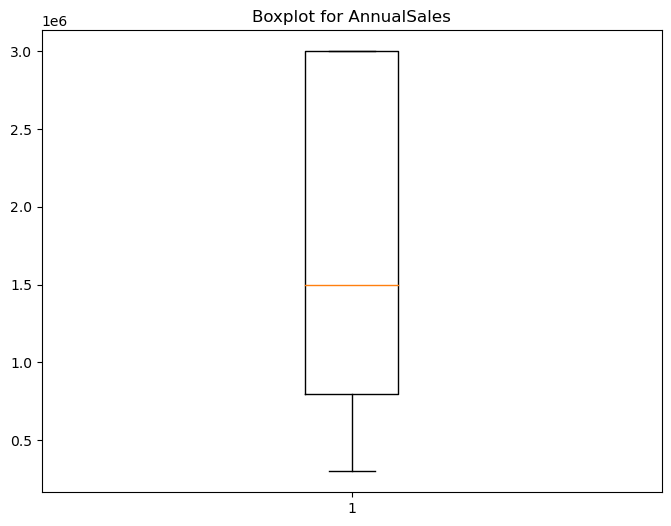

In [36]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col
from pyspark.sql import SparkSession


# Select the numerical column for which you want to create a boxplot
numerical_column = "AnnualSales"

# Extract the numerical column as a PySpark DataFrame
df_spark = new_dim_reseller_df1.select(col(numerical_column))

# Collect the numerical column as a list in the driver
values = [row[0] for row in df_spark.collect()]

# Create a boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(values)
plt.title(f'Boxplot for {numerical_column}')
plt.show()

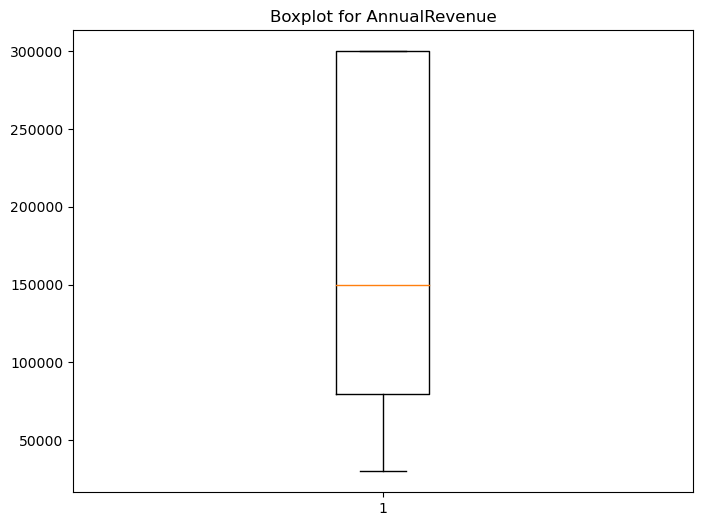

In [37]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col
from pyspark.sql import SparkSession


# Select the numerical column for which you want to create a boxplot
numerical_column = "AnnualRevenue"

# Extract the numerical column as a PySpark DataFrame
df_spark = new_dim_reseller_df1.select(col(numerical_column))

# Collect the numerical column as a list in the driver
values = [row[0] for row in df_spark.collect()]

# Create a boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(values)
plt.title(f'Boxplot for {numerical_column}')
plt.show()

In [38]:
# Get the number of rows
num_rows = new_dim_reseller_df1.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(new_dim_reseller_df1.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 701
Number of Columns: 19


In [39]:
# Drop duplicate rows
new_dim_reseller_df2 = new_dim_reseller_df1.dropDuplicates()

In [40]:
# Get the number of rows
num_rows = new_dim_reseller_df2.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(new_dim_reseller_df2.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 701
Number of Columns: 19


In [41]:
new_dim_reseller_df2.printSchema()

root
 |-- ResellerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- ResellerAlternateKey: string (nullable = true)
 |-- Phone: string (nullable = true)
 |-- BusinessType: string (nullable = true)
 |-- ResellerName: string (nullable = true)
 |-- NumberEmployees: integer (nullable = true)
 |-- OrderFrequency: string (nullable = true)
 |-- OrderMonth: integer (nullable = false)
 |-- FirstOrderYear: integer (nullable = false)
 |-- LastOrderYear: integer (nullable = false)
 |-- ProductLine: string (nullable = true)
 |-- AddressLine1: string (nullable = true)
 |-- AnnualSales: double (nullable = true)
 |-- BankName: string (nullable = true)
 |-- MinPaymentType: integer (nullable = false)
 |-- MinPaymentAmount: double (nullable = false)
 |-- AnnualRevenue: double (nullable = true)
 |-- YearOpened: integer (nullable = true)



In [42]:
dim_geography_df.show()

+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|GeographyKey|          City|StateProvinceCode|StateProvinceName|CountryRegionCode|EnglishCountryRegionName|SpanishCountryRegionName|FrenchCountryRegionName|PostalCode|SalesTerritoryKey|IpAddressLocator|
+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|           1|    Alexandria|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2015|                9|    198.51.100.2|
|           2| Coffs Harbour|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2450|                

In [43]:
dim_geography_df.printSchema()

root
 |-- GeographyKey: string (nullable = true)
 |-- City: string (nullable = true)
 |-- StateProvinceCode: string (nullable = true)
 |-- StateProvinceName: string (nullable = true)
 |-- CountryRegionCode: string (nullable = true)
 |-- EnglishCountryRegionName: string (nullable = true)
 |-- SpanishCountryRegionName: string (nullable = true)
 |-- FrenchCountryRegionName: string (nullable = true)
 |-- PostalCode: string (nullable = true)
 |-- SalesTerritoryKey: string (nullable = true)
 |-- IpAddressLocator: string (nullable = true)



In [44]:
# Get the number of rows
num_rows = dim_geography_df.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(dim_geography_df.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 655
Number of Columns: 11


In [45]:
from pyspark.sql.functions import col

# Convert 'necessary' columns to a numerical data type
dim_geography_df1 = dim_geography_df.withColumn('GeographyKey', col('GeographyKey').cast('int'))
dim_geography_df1 = dim_geography_df1.withColumn('PostalCode', col('PostalCode').cast('int'))
dim_geography_df1 = dim_geography_df1.withColumn('SalesTerritoryKey', col('SalesTerritoryKey').cast('int'))

In [46]:
# Count total missing values in the entire DataFrame
geography_total_missing_values = dim_geography_df.select([col(column).isNull().cast("int").alias(column) for column in dim_geography_df.columns])\
    .groupBy().sum().show()

# Display the total missing values
geography_total_missing_values

+-----------------+---------+----------------------+----------------------+----------------------+-----------------------------+-----------------------------+----------------------------+---------------+----------------------+---------------------+
|sum(GeographyKey)|sum(City)|sum(StateProvinceCode)|sum(StateProvinceName)|sum(CountryRegionCode)|sum(EnglishCountryRegionName)|sum(SpanishCountryRegionName)|sum(FrenchCountryRegionName)|sum(PostalCode)|sum(SalesTerritoryKey)|sum(IpAddressLocator)|
+-----------------+---------+----------------------+----------------------+----------------------+-----------------------------+-----------------------------+----------------------------+---------------+----------------------+---------------------+
|                0|        0|                     0|                     0|                     0|                            0|                            0|                           0|              0|                     0|                    0|
+---

In [47]:
# Get the number of rows
num_rows = dim_geography_df1.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(dim_geography_df1.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 655
Number of Columns: 11


In [48]:
# Drop duplicate rows
new_dim_geography_df2 = dim_geography_df1.dropDuplicates()

In [49]:
# Get the number of rows
num_rows = new_dim_geography_df2.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(new_dim_geography_df2.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 655
Number of Columns: 11


In [50]:
# Alias the columns 'AddressLine1' and 'AddressLine2' in dim_customer_df and dim_reseller_df
# Alias the columns in dim_customer_df and dim_reseller_df
dim_customer_df_alias = new_dim_customer_df2 \
    .withColumnRenamed('AddressLine1', 'Customer_AddressLine1') \
    .withColumnRenamed('AddressLine2', 'Customer_AddressLine2') \
    .withColumnRenamed('Phone', 'Customer_Phone')

dim_reseller_df_alias = new_dim_reseller_df2 \
    .withColumnRenamed('AddressLine1', 'Reseller_AddressLine1') \
    .withColumnRenamed('AddressLine2', 'Reseller_AddressLine2') \
    .withColumnRenamed('Phone', 'Reseller_Phone')

# Joining DataFrames using the 'GeographyKey' column
joined_df = dim_customer_df_alias \
    .join(dim_reseller_df_alias, 'GeographyKey', 'inner') \
    .join(new_dim_geography_df2, 'GeographyKey', 'inner')


# Show the result in Pandas DataFrame
joined_df.show()

+------------+-----------+--------------------+---------+--------+---------+----------+-------------+------+--------------------+------------+-------------+--------------------+----------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+---------------------+-------------------+-----------------+---------------+-----------+--------------------+-------------------+--------------------+--------------------+---------------+--------------+----------+--------------+-------------+-----------+---------------------+-----------+--------------------+--------------+-----------------+-------------+----------+---------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|GeographyKey|CustomerKey|CustomerAlternateKey|FirstName|LastName|NameStyle| BirthDate|MaritalStatus|Gender|        EmailAdd

In [51]:
# Get the number of rows
num_rows = joined_df.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(joined_df.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 11993
Number of Columns: 53


In [52]:
joined_df.printSchema()

root
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: boolean (nullable = false)
 |-- BirthDate: date (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: double (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwnerFlag: integer (nullable = true)
 |-- NumberCarsOwned: integer (nullable = true)
 |-- Customer_AddressLine1: string (n

In [53]:
# Count total missing values in the entire DataFrame
total_missing_values = joined_df.select([col(column).isNull().cast("int").alias(column) for column in joined_df.columns])\
    .groupBy().sum().show()

# Display the total missing values
total_missing_values

+-----------------+----------------+-------------------------+--------------+-------------+--------------+--------------+------------------+-----------+-----------------+-----------------+------------------+-------------------------+---------------------+---------------------+--------------------+----------------------+----------------------+---------------------+-------------------+--------------------+--------------------------+-------------------+----------------------+--------------------+----------------+-------------------------+-------------------+-----------------+-----------------+--------------------+-------------------+---------------+-------------------+------------------+----------------+--------------------------+----------------+-------------+-------------------+---------------------+------------------+---------------+---------+----------------------+----------------------+----------------------+-----------------------------+-----------------------------+----------------

In [54]:
# Drop the 'PostalCode' column and 'CustomerAlternateKey' column as it's not needed for the analysis
joined_df1 = joined_df.select(*[col for col in joined_df.columns if col != 'PostalCode'])
joined_df2 = joined_df1.select(*[col for col in joined_df1.columns if col != 'CustomerAlternateKey'])

In [55]:
# Count total missing values in the entire DataFrame
joined_total_missing_values1 = joined_df2.select([col(column).isNull().cast("int").alias(column) for column in joined_df2.columns])\
    .groupBy().sum().show()

# Display the total missing values (Check if the missing values were handled)
joined_total_missing_values1

+-----------------+----------------+--------------+-------------+--------------+--------------+------------------+-----------+-----------------+-----------------+------------------+-------------------------+---------------------+---------------------+--------------------+----------------------+----------------------+---------------------+-------------------+--------------------+--------------------------+-------------------+----------------------+--------------------+----------------+-------------------------+-------------------+-----------------+-----------------+--------------------+-------------------+---------------+-------------------+------------------+----------------+--------------------------+----------------+-------------+-------------------+---------------------+------------------+---------------+---------+----------------------+----------------------+----------------------+-----------------------------+-----------------------------+----------------------------+-------------

### Check for Outliers

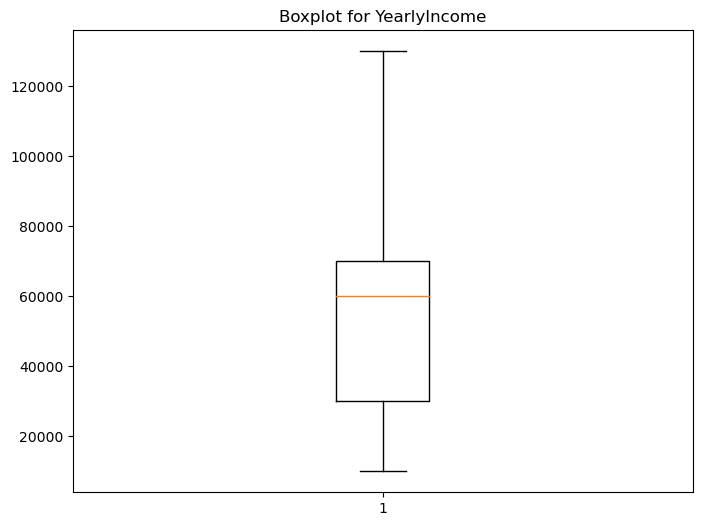

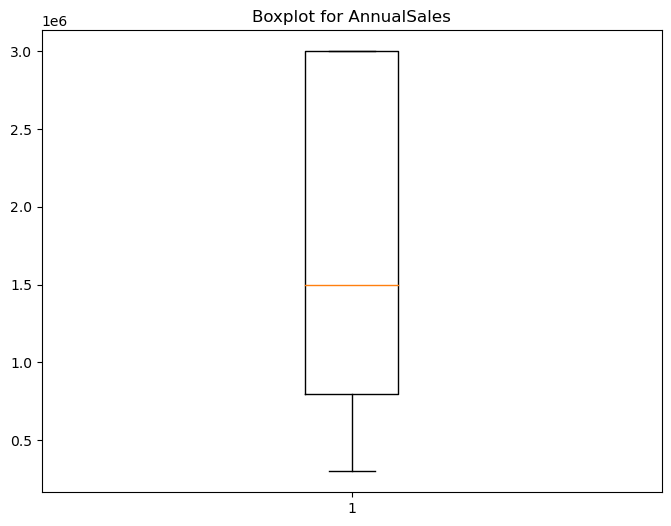

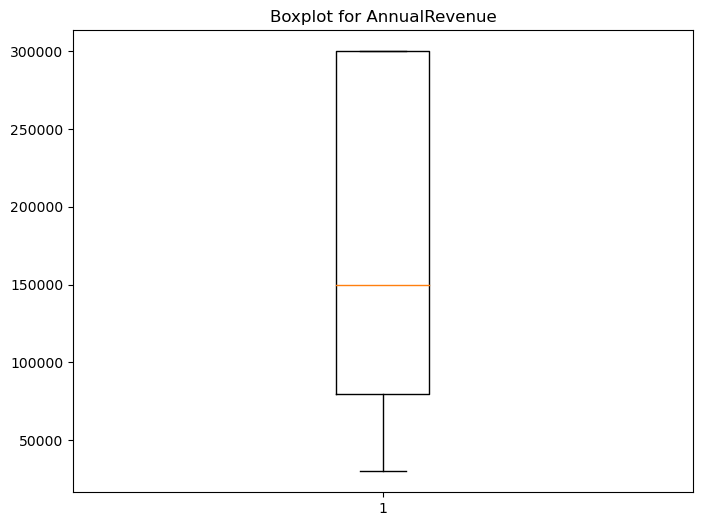

In [56]:
# Import necessary libraries
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Select the numerical columns for which you want to create boxplots
numerical_columns = ["YearlyIncome", "AnnualSales", "AnnualRevenue"]

# Extract the numerical columns as a PySpark DataFrame
df_spark = joined_df2.select(*[col(column) for column in numerical_columns])

# Collect the numerical columns as separate lists in the driver
values = [df_spark.select(column).rdd.flatMap(lambda x: x).collect() for column in numerical_columns]

# Create separate boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.figure(figsize=(8, 6))
    plt.boxplot(values[i])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [57]:
# Get the number of rows
num_rows = joined_df2.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(joined_df2.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 11993
Number of Columns: 51


In [58]:
# Drop duplicate rows
joined_df3 = joined_df2.dropDuplicates()

In [59]:
# Get the number of rows
num_rows = joined_df3.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(joined_df3.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 11993
Number of Columns: 51


In [60]:
joined_df3.printSchema()

root
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: boolean (nullable = false)
 |-- BirthDate: date (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: double (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwnerFlag: integer (nullable = true)
 |-- NumberCarsOwned: integer (nullable = true)
 |-- Customer_AddressLine1: string (nullable = true)
 |-- Customer_Phone: string (nullabl

In [61]:
# Rename the 'YearlyIncome' column to 'YearlyIncome(USD)'
joined_df3 = joined_df3.withColumnRenamed("YearlyIncome", "YearlyIncome(USD)")
# Rename the 'MinPaymentAmount' column to 'MinPaymentAmount(USD)'
joined_df3 = joined_df3.withColumnRenamed("MinPaymentAmount", "MinPaymentAmount(USD)")
# Rename the 'AnnualRevenue' column to 'AnnualRevenue(USD)'
joined_df3 = joined_df3.withColumnRenamed("AnnualRevenue", "AnnualRevenue(USD)")
# Rename the 'AnnualSales' column to 'AnnualSales(USD)'
joined_df3 = joined_df3.withColumnRenamed("AnnualSales", "AnnualSales(USD)")

In [62]:
joined_df3.printSchema()

root
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: boolean (nullable = false)
 |-- BirthDate: date (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome(USD): double (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwnerFlag: integer (nullable = true)
 |-- NumberCarsOwned: integer (nullable = true)
 |-- Customer_AddressLine1: string (nullable = true)
 |-- Customer_Phone: string (nu

In [63]:
import plotly.express as px

In [64]:
# Analysing the cleaned data via SQL Query 

In [65]:
joined_df3.createOrReplaceTempView("my_table") # register the DataFrame as a temporary SQL table

In [66]:
df = spark.sql("""
               SELECT * FROM my_table
               LIMIT 5""")

# Show the results
df.show()

+------------+-----------+---------+--------+---------+----------+-------------+------+--------------------+-----------------+-------------+--------------------+----------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+---------------------+-------------------+-----------------+---------------+-----------+--------------------+-------------------+--------------------+--------------------+---------------+--------------+----------+--------------+-------------+-----------+---------------------+----------------+--------------------+--------------+---------------------+------------------+----------+------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+-----------------+----------------+
|GeographyKey|CustomerKey|FirstName|LastName|NameStyle| BirthDate|MaritalStatus|Gender|        EmailAddress|YearlyIncome(USD)|TotalChildren|

In [67]:
# What is the count of unique customers?

unique_customers_count = spark.sql("SELECT COUNT(DISTINCT CustomerKey) AS unique_customers_count FROM my_table").show()

# Show the results
unique_customers_count

+----------------------+
|unique_customers_count|
+----------------------+
|                  7558|
+----------------------+



**Insights: 

1. **Customer Base Size**:
 * CompanyABC's dataset reveals a robust customer base, comprising a total of 7,558 unique customers.
 * For CompanyABC, understanding the depth and diversity of its customer base serves as a foundational element for devising effective business strategies.

2. **Market Potential**:
 * Assessing the size of the customer base is critical for CompanyABC to gauge the market potential it can explore.
 * As CompanyABC seeks insights into the performance of different product lines, regions, categories, and customer segments, understanding the market potential derived from the unique customer count becomes pivotal for strategic decision-making.

3. **Customer Relationship Management**:
 * The clear count of unique customers empowers CompanyABC to focus on tailored customer relationship management (CRM) strategies.
 * For CompanyABC, which aims to understand customer preferences across various regions and categories, the ability to deploy personalized approaches based on the unique customer data is instrumental in building and maintaining strong customer relationships.

4. **Segmentation Opportunities**:
 * The sizable number of unique customers offers CompanyABC significant opportunities for segmentation based on demographics, behavior, and preferences.
 * As CompanyABC seeks insights into which product lines, regions, and customer segments work best for them, effective segmentation allows for targeted strategies tailored to specific customer groups.

5. **Marketing Reach**:
 * Analyzing the unique customer count enables CompanyABC to evaluate the reach of its marketing efforts.
 * For CompanyABC, looking to identify areas for potential expansion and refine marketing strategies for specific regions and categories, insights into marketing reach derived from the unique customer count are crucial for effective expansion strategies.

6. **Customer Retention**:
 * Understanding the total number of unique customers is crucial for CompanyABC to monitor and improve customer retention strategies.
 * As CompanyABC focuses on predicting annual sales revenue and ensuring customer loyalty, insights into the unique customer count contribute to strategic efforts in retaining a satisfied and engaged customer base.

For CompanyABC, the insights derived from the dataset's customer base size are of paramount importance in shaping its business strategies. The large and diverse customer base provides valuable information to understand which product lines, regions, categories, and customer segments work best for the company. Leveraging this data allows CompanyABC to tailor its CRM strategies, fostering stronger relationships and meeting individual customer needs. The segmentation opportunities presented by a substantial customer base enable CompanyABC to analyze performance across different dimensions, guiding targeted strategies for optimal outcomes. Understanding the marketing reach aids in identifying areas for potential expansion and refining marketing efforts, aligning them with specific regions and categories. Finally, effective customer retention strategies, informed by the total number of unique customers, contribute to CompanyABC's ability to predict annual sales revenue and maintain a loyal customer base for sustained success.

In [68]:
# What is the count of customers by gender?

customers_count_by_gender = spark.sql("""
    SELECT Gender, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY Gender
""").show()

# Show the results
customers_count_by_gender

+------+--------------+
|Gender|customer_count|
+------+--------------+
|     F|          5887|
|     M|          6106|
+------+--------------+



In [69]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
customers_count_by_gender = spark.sql("""
    SELECT Gender, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY Gender
""")

# Collect the results as a list of dictionaries
result_list = customers_count_by_gender.collect()

# Extract the gender and count values
genders = [row["Gender"] for row in result_list]
counts = [row["customer_count"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=genders, y=counts)])
fig.update_layout(title='Count of Customers by Gender', xaxis_title='Gender', yaxis_title='Count')
fig.show()

**Insights:

* The count of customers by gender is as follows:
 * Female (F): 5,887 customers
 * Male (M): 6,106 customers

1. **Gender Distribution**:
 * CompanyABC's dataset reveals a relatively balanced gender distribution, with a slightly higher number of male customers compared to female customers.
 * Understanding this gender distribution is crucial for CompanyABC as it embarks on a journey to tailor its business strategies to the diverse needs and preferences of both male and female customers.

2. **Marketing Strategies**:
 * Tailoring marketing strategies to address the needs and preferences of both genders is essential for CompanyABC's inclusivity in its campaigns.
 * As CompanyABC seeks to understand the performance of different product lines, regions, and categories, acknowledging the gender distribution is pivotal for creating marketing campaigns that resonate with its diverse customer base.

3. **Customer Engagement**:
 * Recognizing the gender distribution in the dataset is essential for CompanyABC to create engaging and relevant content that resonates with its target audience.
 * As CompanyABC delves into predicting annual sales revenue and refining marketing efforts, understanding how gender influences customer engagement provides insights for crafting content that captures the attention of both male and female customers.

4. **Product and Service Customization**:
 * CompanyABC may consider customizing products or services based on gender preferences to enhance customer satisfaction.
 * Insights into the gender breakdown contribute to CompanyABC's ability to personalize its offerings, aligning product customization with the distinct preferences of male and female customers.

5. **Targeted Promotions**:
 * Designing targeted promotions and discounts considering the gender distribution is a strategic approach for CompanyABC.
 * As CompanyABC aims to optimize its promotional strategies and boost customer engagement, understanding the gender breakdown guides the development of promotions that appeal to both male and female customers.

6. **Demographic Insights**:
 * The gender breakdown serves as a foundation for more in-depth demographic analysis for CompanyABC.
 * As CompanyABC seeks knowledge about what works best for them, the gender insights open avenues for exploring additional factors such as age, income, and education. This comprehensive demographic understanding is instrumental for tailoring strategies across product lines, regions, categories, and customer segments.

For CompanyABC, recognizing the balanced gender distribution in its customer base is pivotal for developing customer-centric strategies. As the company seeks insights into product line performance, regional dynamics, and customer segments for predicting annual sales revenue, understanding gender influences becomes integral to crafting inclusive marketing strategies. The ability to engage both male and female customers through tailored content and promotions enhances overall customer satisfaction. Moreover, leveraging demographic insights, including gender, positions CompanyABC to explore additional factors for a comprehensive understanding of its diverse customer base, contributing to targeted and effective business strategies.

In [70]:
# What is the average yearly income by education level
avg_income_by_education = spark.sql("""
    SELECT
        EnglishEducation,
        ROUND(AVG(`YearlyIncome(USD)`), 2) AS avg_yearly_income_in_usd
    FROM
        my_table
    GROUP BY
        EnglishEducation
""").show()

# Show the results
avg_income_by_education

+-------------------+------------------------+
|   EnglishEducation|avg_yearly_income_in_usd|
+-------------------+------------------------+
|        High School|                48005.04|
|Partial High School|                39135.34|
|    Graduate Degree|                62679.13|
|    Partial College|                 53484.8|
|          Bachelors|                62031.48|
+-------------------+------------------------+



In [71]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
avg_income_by_education = spark.sql("""
    SELECT
        EnglishEducation,
        ROUND(AVG(`YearlyIncome(USD)`), 2) AS avg_yearly_income_in_usd
    FROM
        my_table
    GROUP BY
        EnglishEducation
""")

# Extract the education level and average income values
education_levels = avg_income_by_education.select("EnglishEducation").rdd.flatMap(lambda x: x).collect()
avg_incomes = avg_income_by_education.select("avg_yearly_income_in_usd").rdd.flatMap(lambda x: x).collect()

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=education_levels, y=avg_incomes)])
fig.update_layout(title='Average Yearly Income by Education Level', xaxis_title='Education Level', yaxis_title='Average Yearly Income (USD)')
fig.show()

**Insights:

**The average yearly income by education level is as follows**:

 * High School: $48,005.04
 * Partial High School: $39,135.34
 * Graduate Degree: $62,679.13
 * Partial College: $53,484.80
 * Bachelors: $62,031.48


1. **Income Disparities**:
 * Notable differences exist in average yearly income across distinct education levels, indicating a socio-economic stratification based on educational attainment.

2. **Educational Attainment and Income**:
 * A general trend emerges, showcasing that individuals with higher educational attainment, specifically Graduate Degrees and Bachelors degrees, tend to enjoy higher average yearly incomes compared to their counterparts with lower educational levels.

3. **Economic Impact of Education**:
 * The data underscores a positive correlation between education levels and income, emphasizing the significant economic impact of pursuing higher education.

4. **Educational Investment**:
 * Individuals who have invested in Graduate Degrees and Bachelors degrees may reap the rewards through higher-paying career opportunities, showcasing the potential return on educational investment.

5. **Targeted Marketing**:
 * For CompanyABC, this information presents a valuable opportunity for targeted marketing efforts. Tailoring products or services based on the income levels associated with different education categories aligns with a strategic approach to meet the diverse needs of distinct customer segments.

6. **Educational Planning**:
 * Beyond the scope of business, policymakers and educators can leverage this insight to plan educational programs and initiatives. Understanding the potential economic outcomes for individuals with different educational backgrounds contributes to informed decision-making in the realm of education.

For CompanyABC, the insights into income variations based on education levels offer a nuanced understanding of its customer base. As the company seeks knowledge to refine strategies related to product lines, regions, and customer segments for predicting annual sales revenue, acknowledging the socio-economic implications of education becomes paramount. CompanyABC can leverage this information for targeted marketing, aligning its offerings with the income levels associated with diverse education categories. Additionally, as CompanyABC explores potential areas for expansion and growth, understanding the economic impact of education guides strategic decisions, contributing to a comprehensive and informed approach to business planning.

In [72]:
# What is the count of customers by occupation?

customers_count_by_occupation = spark.sql("""
    SELECT EnglishOccupation, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY EnglishOccupation
""").show()

# Show the results
customers_count_by_occupation

+-----------------+--------------+
|EnglishOccupation|customer_count|
+-----------------+--------------+
|       Management|          1866|
|     Professional|          3658|
|         Clerical|          1931|
|           Manual|          1656|
|   Skilled Manual|          2882|
+-----------------+--------------+



In [73]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
customers_count_by_occupation = spark.sql("""
    SELECT EnglishOccupation, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY EnglishOccupation
""")

# Collect the results as a list of dictionaries
result_list = customers_count_by_occupation.collect()

# Extract the occupation and customer count values
occupations = [row["EnglishOccupation"] for row in result_list]
customer_counts = [row["customer_count"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=occupations, y=customer_counts)])
fig.update_layout(title='Count of Customers by Occupation', xaxis_title='Occupation', yaxis_title='Customer Count')
fig.show()

**Insights:

**The count of customers by occupation is as follows**:

 * Management: 1,866 customers
 * Professional: 3,658 customers
 * Clerical: 1,931 customers
 * Manual: 1,656 customers
 * Skilled Manual: 2,882 customers


1. **Occupation Distribution**:
 * The dataset showcases a diverse distribution of customers across various occupations, highlighting the varied professional backgrounds within the customer base.

2. **Professional Dominance**:
 * The Professional occupation category emerges with the highest customer count, indicating a substantial presence of professionals within the dataset. This suggests a significant market share among individuals in professional roles.

3. **Marketing Opportunities**:
 * For CompanyABC, recognizing the dominance of the Professional occupation category presents valuable opportunities for targeted marketing. Tailoring marketing strategies to resonate with this professional segment can enhance the effectiveness of campaigns and promotional activities.

4. **Skilled Manual Workforce**:
 * The presence of a substantial customer count in the Skilled Manual occupation category indicates a notable representation of skilled manual workers within the dataset. This insight is crucial for understanding the preferences and needs of this specific workforce segment.

5. **Clerical and Management Representation**:
 * Clerical and Management occupations, while having comparatively lower counts, still represent important segments within the dataset. Understanding the distribution across these categories provides insights into the administrative and managerial components of the customer base.

6. **Business Planning**:
 * CompanyABC can leverage the understanding of customer distribution across occupations for strategic business planning. This includes customization of products or services based on occupational preferences and effective resource allocation to align with the diverse needs of the customer segments.

7. **Workforce Diversity**:
 * The dataset's diversity in occupation types signifies a mix of skills and expertise among customers. This diversity is a valuable asset for CompanyABC, offering a broad market presence with customers from various professional backgrounds.

As CompanyABC seeks to understand what works best for them and aims to predict their annual sales revenue, the insights into occupation distribution play a pivotal role. Tailoring product lines, targeting specific regions, and identifying key customer segments become more nuanced when considering the diversity in occupations. CompanyABC can capitalize on the dominance of the Professional category in its marketing strategies, while also addressing the unique needs of the Skilled Manual workforce. Additionally, recognizing the representation of Clerical and Management occupations guides specific approaches to meet the preferences of these segments. This detailed understanding of the customer base's occupational diversity contributes to a more informed and effective strategic planning process for CompanyABC.

In [74]:
# What is the total number of children at home by marital status?

total_children_at_home = spark.sql("""
    SELECT MaritalStatus, SUM(NumberChildrenAtHome) AS total_children_at_home
    FROM my_table
    GROUP BY MaritalStatus
""").show()

# Show the results
total_children_at_home

+-------------+----------------------+
|MaritalStatus|total_children_at_home|
+-------------+----------------------+
|            M|                  7221|
|            S|                  4670|
+-------------+----------------------+



In [75]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
total_children_at_home = spark.sql("""
    SELECT MaritalStatus, SUM(NumberChildrenAtHome) AS total_children_at_home
    FROM my_table
    GROUP BY MaritalStatus
""")

# Collect the results as a list of dictionaries
result_list = total_children_at_home.collect()

# Extract the marital status and total children at home values
marital_status = [row["MaritalStatus"] for row in result_list]
total_children = [row["total_children_at_home"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=marital_status, y=total_children)])
fig.update_layout(title='Total Number of Children at Home by Marital Status', xaxis_title='Marital Status', yaxis_title='Total Children at Home')
fig.show()

**Insights:

**The total number of children at home by marital status is as follows**:

 * MaritalStatus "M" (Married): 7,221 children
 * MaritalStatus "S" (Single): 4,670 children

1. **Family Structure and Children**:
 * The dataset portrays a notable distinction in the total number of children at home based on marital status. Married individuals ("M") tend to have a higher count of children compared to their single counterparts ("S").

2. **Marital Status Impact on Family Size**:
 * An evident observation is the potential impact of marital status on the size of families. The data suggests that married individuals, as reflected by the "M" marital status, are associated with larger households characterized by a higher number of children.

3. **Targeted Family-oriented Marketing**:
 * For CompanyABC, this insight holds significance in tailoring marketing strategies, especially for family-oriented products or services. Recognizing the higher representation of households with children among married individuals provides an opportunity for targeted marketing efforts in this segment.

4. **Household Dynamics**:
 * Understanding the total number of children at home offers insights into the dynamics of households. This information is instrumental in shaping decisions related to product or service offerings that cater to the needs and preferences of families with children.

5. **Social and Economic Implications**:
 * The data indirectly sheds light on societal and economic factors intertwined with family planning and household structures. These implications contribute to a nuanced understanding of the customer landscape.


6. **Policy Considerations**:
 * Policymakers can leverage this information for social policy considerations, particularly those related to family support and child welfare. The data provides a basis for informed decision-making in areas impacting families and children.

As CompanyABC navigates the terrain of understanding what works best for them and aims to predict their annual sales revenue, the insights into family structure and children become pivotal. Tailoring product lines, targeting specific regions, and identifying key customer segments gain depth with the understanding that married individuals likely form larger households with more children. CompanyABC can align its marketing and product strategies to resonate with the dynamics of family-oriented consumers, fostering a more tailored and effective approach to meet the unique needs of this segment.

In [76]:
# What is the count of customers by house ownership status?

customers_count_by_house_ownership = spark.sql("""
    SELECT HouseOwnerFlag, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY HouseOwnerFlag
""").show()

# Show the results
customers_count_by_house_ownership

+--------------+--------------+
|HouseOwnerFlag|customer_count|
+--------------+--------------+
|             1|          8091|
|             0|          3902|
+--------------+--------------+



In [77]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
customers_count_by_house_ownership = spark.sql("""
    SELECT HouseOwnerFlag, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY HouseOwnerFlag
""")

# Collect the results as a list of dictionaries
result_list = customers_count_by_house_ownership.collect()

# Extract the house ownership status and customer count values
house_ownership_status = [row["HouseOwnerFlag"] for row in result_list]
customer_counts = [row["customer_count"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=house_ownership_status, y=customer_counts)])
fig.update_layout(title='Count of Customers by House Ownership Status', xaxis_title='House Ownership Status', yaxis_title='Customer Count')
fig.show()

**Insights:

**The count of customers by house ownership status is as follows**:

 * HouseOwnerFlag 1 (Owns a House): 8,091 customers
 * HouseOwnerFlag 0 (Does not Own a House): 3,902 customers


1. **House Ownership Distribution**:
 * The dataset underscores a notable disparity in the count of customers based on house ownership status. A substantial majority of customers fall under HouseOwnerFlag 1, indicating ownership of houses, while a smaller count corresponds to HouseOwnerFlag 0, signifying those who do not own houses.

2. **Homeownership Impact**:
 * The prevalence of homeowners within the dataset signals a substantial impact of homeownership on the customer base. Understanding this impact is crucial for shaping CompanyABC's business strategies that resonate with the preferences and behaviors of homeowners.

3. **Market Segmentation**:
 * For CompanyABC, recognizing the distinct distribution of customers based on house ownership status opens avenues for strategic market segmentation. Tailoring products or services to cater to the unique needs and aspirations of homeowners and non-homeowners becomes a viable strategy to enhance customer engagement and satisfaction.

4. **Real Estate Market Influence**:
 * The data may reflect the influence of the real estate market on the composition of the customer base. This insight is valuable for CompanyABC if they are looking into operating in or associating with the real estate industry, offering a lens into the market dynamics.

5. **Financial Implications**:
 * The count of customers categorized by house ownership status provides valuable insights into the financial landscape of the customer base. Understanding the financial capabilities and preferences of homeowners and non-homeowners contributes to informed decision-making.

6. **Targeted Offerings**:
 * CompanyABC can look into expanding into the real estate, home improvement, or related industries and leverage this insight for targeted offerings. Tailoring products or services based on customers' house ownership status enhances relevance and increases the likelihood of positive customer response.

As CompanyABC navigates the journey of understanding what works best for them and aims to predict their annual sales revenue, the insights into house ownership status become instrumental. Tailoring product lines, devising targeted strategies for specific regions, and identifying key customer segments gain depth when considering the distribution of homeowners and non-homeowners. CompanyABC can align its business decisions with the financial and market dynamics associated with house ownership, paving the way for strategic success.

In [78]:
# What is the total number of cars owned by gender?

total_cars_owned_by_gender = spark.sql("""
    SELECT Gender, SUM(NumberCarsOwned) AS total_cars_owned
    FROM my_table
    GROUP BY Gender
""").show()

# Show the results
total_cars_owned_by_gender

+------+----------------+
|Gender|total_cars_owned|
+------+----------------+
|     F|            8949|
|     M|            9204|
+------+----------------+



In [79]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
total_cars_owned_by_gender = spark.sql("""
    SELECT Gender, SUM(NumberCarsOwned) AS total_cars_owned
    FROM my_table
    GROUP BY Gender
""")

# Collect the results as a list of dictionaries
result_list = total_cars_owned_by_gender.collect()

# Extract the gender and total cars owned values
genders = [row["Gender"] for row in result_list]
total_cars_owned = [row["total_cars_owned"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=genders, y=total_cars_owned)])
fig.update_layout(title='Total Number of Cars Owned by Gender', xaxis_title='Gender', yaxis_title='Total Cars Owned')
fig.show()

**Insights:

**The total number of cars owned by gender is as follows**:

 * Female (F): 8,949 cars
 * Male (M): 9,204 cars


1. **Car Ownership Across Genders**:
 * The dataset portrays a balanced distribution of cars owned by both females and males. This equilibrium indicates that car ownership is not significantly skewed towards one gender, highlighting a diverse ownership landscape.

2. **Similar Car Ownership**:
 * The comparable total number of cars owned by females and males suggests a parallel level of car ownership across genders within the dataset. This parity in car ownership patterns is a notable observation for strategic considerations.

3. **Market Opportunities**:
 * For CompanyABC, this insight opens avenues for exploring market opportunities in the automotive industry or related sectors. Recognizing that both female and male customers exhibit substantial car ownership, the company can tailor its products or services to meet the automotive needs of a broad and diverse customer base.

4. **Gender-Neutral Trends**:
 * The absence of a significant gender-based disparity in car ownership indicates gender-neutral trends in the dataset. This insight is pivotal for dispelling assumptions and stereotypes related to gender-specific car ownership preferences.

5. **Transportation Preferences**:
 * Understanding the dataset's insights into car ownership patterns provides valuable information about the transportation preferences and behaviors of the customer base. This understanding is instrumental for businesses like CompanyABC that are keen on aligning their offerings with customer preferences.

6. **Marketing and Advertising Insights**:
 * Advertisers and marketers within CompanyABC can leverage this data to create gender-inclusive campaigns. By recognizing the diverse ownership landscape, marketing efforts can resonate with a wide audience of car owners, promoting inclusivity in messaging.

As CompanyABC embarks on the journey of understanding what works best for them and aims to predict their annual sales revenue, the insights into car ownership by gender become a valuable component. Tailoring product lines, devising targeted strategies for specific regions, and identifying key customer segments can benefit from recognizing the balanced car ownership distribution across genders. This insight informs CompanyABC's strategic decisions, ensuring alignment with the diverse automotive preferences of its customer base. 

In [80]:
# What is the count of customers by product line?

customers_count_by_product_line = spark.sql("""
    SELECT ProductLine, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY ProductLine
""").show()

# Show the results
customers_count_by_product_line

+-----------+--------------+
|ProductLine|customer_count|
+-----------+--------------+
|   Mountain|          3179|
|       Road|          4227|
|    Touring|          4587|
+-----------+--------------+



In [81]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
customers_count_by_product_line = spark.sql("""
    SELECT ProductLine, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY ProductLine
""")

# Collect the results as a list of dictionaries
result_list = customers_count_by_product_line.collect()

# Extract the product line and customer count values
product_lines = [row["ProductLine"] for row in result_list]
customer_counts = [row["customer_count"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=product_lines, y=customer_counts)])
fig.update_layout(title='Count of Customers by Product Line', xaxis_title='Product Line', yaxis_title='Customer Count')
fig.show()

**Insights:

**The count of customers by product line is as follows**:

 * Mountain: 3,179 customers
 * Road: 4,227 customers
 * Touring: 4,587 customers


1. **Product Line Distribution**:
 * The dataset reveals a distribution of customers across different product lines, encompassing Mountain, Road, and Touring. This diversity suggests that customers exhibit varied preferences for distinct types of products.

2. **Diverse Product Preferences**:
 * The presence of customers across multiple product lines indicates a diverse array of product preferences within the customer base. This diversity is a key aspect for CompanyABC to consider in its strategic planning.

3. **Market Demand**:
 * The higher count in the Road and Touring product lines may imply a potentially elevated market demand for these specific types of products. Recognizing the demand trends aids in aligning production and marketing efforts accordingly.

4. **Opportunities for Targeted Marketing**:
 * Leveraging this information, CompanyABC can implement targeted marketing strategies. By tailoring promotions and advertisements to specific product lines based on customer preferences, the company can enhance the effectiveness of its marketing campaigns.

5. **Inventory and Production Planning**:
 * The data provides valuable insights into customer preferences, facilitating informed inventory and production planning. By understanding the popularity of different product lines, CompanyABC can allocate resources efficiently to meet market demands.

6. **Customer Segmentation**:
 * Understanding customer preferences for distinct product lines supports effective customer segmentation. This segmentation, based on product preferences, enables CompanyABC to craft personalized marketing approaches that resonate with specific customer segments.

7. **Strategic Decision-Making**:
 * The popularity of different product lines serves as a crucial factor for strategic decision-making. CompanyABC can use this insight to guide investments, allocate resources appropriately, and make informed decisions aligned with market dynamics.

As CompanyABC navigates the landscape of understanding what works best for them and aims to predict annual sales revenue, these insights into customer preferences across product lines become instrumental. Tailoring strategies for specific product lines, optimizing inventory based on demand, and crafting targeted marketing campaigns can be central components of CompanyABC's approach. This insight guides the company in making strategic decisions that align with market demand and customer expectations, ultimately contributing to the prediction of annual sales revenue.

In [82]:
# What is the total annual sales by country?

sales_by_country = spark.sql("""
    SELECT EnglishCountryRegionName, SUM(`AnnualSales(USD)`) AS total_sales_in_usd
    FROM my_table
    GROUP BY EnglishCountryRegionName
""").show()

# Show the results
sales_by_country

+------------------------+------------------+
|EnglishCountryRegionName|total_sales_in_usd|
+------------------------+------------------+
|                 Germany|           1.442E9|
|                  France|          2.7696E9|
|           United States|          7.2967E9|
|                  Canada|           8.049E8|
|               Australia|          4.9297E9|
|          United Kingdom|          1.7813E9|
+------------------------+------------------+



In [83]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
sales_by_country = spark.sql("""
    SELECT EnglishCountryRegionName, SUM(`AnnualSales(USD)`) AS total_sales_in_usd
    FROM my_table
    GROUP BY EnglishCountryRegionName
""")

# Collect the results as a list of dictionaries
result_list = sales_by_country.collect()

# Extract the country and total sales values
countries = [row["EnglishCountryRegionName"] for row in result_list]
total_sales = [row["total_sales_in_usd"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=countries, y=total_sales)])
fig.update_layout(title='Total Annual Sales by Country', xaxis_title='Country', yaxis_title='Total Sales (USD)')
fig.show()

**Insights:

**The total annual sales by country are as follows**:

 * Germany: $1.442 billion USD
 * France: $2.7696 billion USD
 * United States: $7.2967 billion USD
 * Canada: $804.9 million USD
 * Australia: $4.9297 billion USD
 * United Kingdom: $1.7813 billion USD


1. **Sales Distribution Across Countries**:
 * The dataset unveils the distribution of annual sales across multiple countries, offering valuable insights into the geographical market reach of CompanyABC.

2. **Market Size Variations**:
 * Variances in total sales values among countries suggest differences in market sizes. Understanding these variations is crucial for CompanyABC's strategic planning.

3. **High Sales in the United States**:
 * The United States emerges as the market leader with the highest total annual sales. This signals either a substantial market share or a robust customer base in the U.S.

4. **Opportunities for Expansion**:
 * Recognizing countries with lower total sales, such as Canada or Germany, presents opportunities for CompanyABC to explore expansion possibilities or implement targeted marketing strategies in these regions.

5. **Market Trends and Preferences**:
 * Differences in sales values may indicate specific market trends, customer preferences, or economic factors unique to each country. Understanding these nuances is pivotal for adapting products and strategies accordingly.

6. **Global Business Strategy**:
 * The information serves as a guiding factor for CompanyABC's global business strategy. It aids in resource allocation, prioritization of markets, and the customization of approaches based on regional sales performance.

7. **Currency Considerations**:
 * Variations in currency values contribute to the differences in total sales. Recognizing these currency considerations is essential for CompanyABC's pricing strategies and financial planning on a global scale.

As CompanyABC seeks knowledge to understand what works best for them, the insights into total annual sales across different countries become pivotal. The data guides strategic decisions, helping the company identify potential areas for expansion, tailor marketing strategies, and align their global business approach with regional market dynamics. Understanding market trends, preferences, and currency considerations enhances CompanyABC's ability to predict annual sales revenue and make informed decisions in a global context.

In [84]:
# What is the total annual revenue by country?

revenue_by_country = spark.sql("""
    SELECT EnglishCountryRegionName, SUM(`AnnualRevenue(USD)`) AS total_revenue_in_usd
    FROM my_table
    GROUP BY EnglishCountryRegionName
""").show()

# Show the results
revenue_by_country

+------------------------+--------------------+
|EnglishCountryRegionName|total_revenue_in_usd|
+------------------------+--------------------+
|                 Germany|             1.442E8|
|                  France|            2.7696E8|
|           United States|            7.2967E8|
|                  Canada|             8.049E7|
|               Australia|            4.9297E8|
|          United Kingdom|            1.7813E8|
+------------------------+--------------------+



In [85]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
revenue_by_country = spark.sql("""
    SELECT EnglishCountryRegionName, SUM(`AnnualRevenue(USD)`) AS total_revenue_in_usd
    FROM my_table
    GROUP BY EnglishCountryRegionName
""")

# Collect the results as a list of dictionaries
result_list = revenue_by_country.collect()

# Extract the country and total revenue values
countries = [row["EnglishCountryRegionName"] for row in result_list]
total_revenue = [row["total_revenue_in_usd"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=countries, y=total_revenue)])
fig.update_layout(title='Total Annual Revenue by Country', xaxis_title='Country', yaxis_title='Total Revenue (USD)')
fig.show()

**Insights:

**The total annual revenue by country is as follows**:

 * Germany: $144.2 million USD
 * France: $276.96 million USD
 * United States: $729.67 million USD
 * Canada: $80.49 million USD
 * Australia: $492.97 million USD
 * United Kingdom: $178.13 million USD

1. **Revenue Distribution Across Countries**:
 * The dataset unveils the distribution of annual revenue across multiple countries, providing insights into the geographical revenue landscape for CompanyABC.

2. **Correlation with Sales**:
 * Comparing the total revenue figures with total sales allows for an assessment of the efficiency of revenue generation relative to sales in each country. This correlation is vital for evaluating overall business performance.

3. **Relative Revenue Sizes**:
 * Variances in total revenue values among countries indicate differences in the relative sizes of markets and economic conditions. Understanding these variations is essential for strategic planning.

4. **Revenue Per Customer**:
 * Calculating revenue per customer in each country offers insights into customer spending patterns. It helps gauge the effectiveness of revenue generation strategies and tailor approaches to maximize customer value.

5. **Profitability Analysis**:
 * Understanding the profitability of operations in each country is crucial for making informed business decisions. This analysis ensures that resources are allocated efficiently and that the business maintains sustainable growth.

6. **Revenue Concentration**:
 * High revenue figures may suggest concentrated revenue sources or a strong market presence in specific countries. Diversification strategies can be explored based on these insights.

7. **Market-specific Strategies**:
 * CompanyABC, can use this information to formulate market-specific strategies. Adjusting pricing, marketing, and sales approaches based on regional revenue performance enhances the effectiveness of business operations.

8. **Currency Impact**:
 * Currency differences may contribute to variations in total revenue figures. Recognizing and mitigating the impact of currency fluctuations is crucial for maintaining financial stability and making accurate cross-country comparisons.

These insights contribute to a holistic understanding of the revenue landscape across different countries, providing a foundation for strategic decision-making tailored to CompanyABC's global operations. Understanding market-specific dynamics enables the company to predict annual sales revenue and optimize its approach for sustainable growth.

In [86]:
# What is the average annual sales by state/province?

avg_sales_by_state = spark.sql("""
    SELECT
        StateProvinceName,
        ROUND(AVG(`AnnualSales(USD)`), 2) AS avg_sales_in_usd
    FROM
        my_table
    GROUP BY
        StateProvinceName
""").show()

# Show the results
avg_sales_by_state

+-------------------+----------------+
|  StateProvinceName|avg_sales_in_usd|
+-------------------+----------------+
|               Ohio|      1916666.67|
|             Oregon|      1121724.52|
|               Nord|        800000.0|
|              Texas|       1400000.0|
|        Brandenburg|        800000.0|
|    South Australia|      2512658.23|
|           Victoria|       954766.03|
|      Pas de Calais|       1500000.0|
|             Bayern|       1900000.0|
|         Val d'Oise|       3000000.0|
|     Hauts de Seine|       1525000.0|
|            Alberta|      1818181.82|
|    New South Wales|      1592018.56|
|         Washington|      1699160.28|
|           Illinois|       1000000.0|
|            Hamburg|      1452112.68|
|     Seine et Marne|       2250000.0|
|Nordrhein-Westfalen|      1811363.64|
|       Val de Marne|       1500000.0|
|             Hessen|        978145.7|
+-------------------+----------------+
only showing top 20 rows



In [87]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
avg_sales_by_state = spark.sql("""
    SELECT
        StateProvinceName,
        ROUND(AVG(`AnnualSales(USD)`), 2) AS avg_sales_in_usd
    FROM
        my_table
    GROUP BY
        StateProvinceName
""")

# Collect the results as a list of dictionaries
result_list = avg_sales_by_state.collect()

# Extract the state/province and average sales values
states = [row["StateProvinceName"] for row in result_list]
avg_sales = [row["avg_sales_in_usd"] for row in result_list]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=states, y=avg_sales)])
fig.update_layout(title='Average Annual Sales by State/Province', xaxis_title='State/Province', yaxis_title='Average Sales (USD)')
fig.show()

**Insights:

**The average annual sales by state/province are as follows (top 20 entries)**:

 * Ohio: $1,916,666.67 USD
 * Oregon: $1,121,724.52 USD
 * Nord: $800,000.00 USD
 * Texas: $1,400,000.00 USD
 * Brandenburg: $800,000.00 USD
 * South Australia: $2,512,658.23 USD
 * Victoria: $954,766.03 USD
 * Pas de Calais: $1,500,000.00 USD
 * Bayern: $1,900,000.00 USD
 * Val d'Oise: $3,000,000.00 USD
 * Hauts de Seine: $1,525,000.00 USD
 * Alberta: $1,818,181.82 USD
 * New South Wales: $1,592,018.56 USD
 * Washington: $1,699,160.28 USD
 * Illinois: $1,000,000.00 USD
 * Hamburg: $1,452,112.68 USD
 * Seine et Marne: $2,250,000.00 USD
 * Nordrhein-Westfalen: $1,811,363.64 USD
 * Val de Marne: $1,500,000.00 USD
 * Hessen: $978,145.70 USD


1. **Regional Sales Variations**:
 * The dataset illuminates variations in average annual sales across different states and provinces, revealing the dynamic nature of regional markets.

2. **High-Performing Regions**:
 * States like Ohio, South Australia, and New South Wales emerge as high performers with notable average annual sales, suggesting strong market demand and potential customer engagement.

3. **Opportunities for Improvement**:
 * Regions with lower average sales, such as Oregon or Victoria, present opportunities for targeted marketing or tailored sales improvement strategies. Identifying and addressing potential challenges can enhance overall performance.

4. **Market Specifics**:
 * Understanding the nuances of each state or province is crucial for businesses, guiding them in tailoring their approaches to align with regional preferences, cultural nuances, and market dynamics.

5. **Impact of Economic Factors**:
 * Economic conditions and local market factors may contribute to the observed differences in sales figures. Consideration of these factors is essential for a comprehensive understanding of regional sales dynamics.

6. **Strategic Planning**:
 * CompanyABC, can leverage this information for strategic planning. This includes resource allocation, focused marketing efforts, and product/service customization to cater to the unique demands of each region.

7. **Industry Insights**:
 * Different regions may exhibit varying preferences for specific industries. Analyzing industry-specific performance in various regions provides valuable insights into the overall sales landscape.

These insights offer a foundational understanding of the regional sales landscape, empowering CompanyABC to make informed decisions regarding product lines, regions, categories, and customer segments. This knowledge is instrumental in predicting annual sales revenue and optimizing strategies for sustainable growth.

In [88]:
# What is the total annual revenue by city?

revenue_by_city = spark.sql("""
    SELECT
        City,
        ROUND(SUM(`AnnualRevenue(USD)`), 2) AS total_revenue_in_usd
    FROM
        my_table
    GROUP BY
        City
""").show()

# Show the results
revenue_by_city

+----------------+--------------------+
|            City|total_revenue_in_usd|
+----------------+--------------------+
| South Melbourne|           7900000.0|
|       Clackamas|            450000.0|
|     Duesseldorf|           1700000.0|
|         M�nchen|              1.38E7|
|         Everett|              6.65E7|
|       Lane Cove|               2.4E7|
|        Woolston|           3600000.0|
|       Frankfurt|           2400000.0|
|         Malabar|               1.2E7|
|        Colombes|              2.28E7|
|    Darlinghurst|           6400000.0|
|        Lynnwood|           9600000.0|
|          Oxford|           8100000.0|
|         W. York|              1.62E7|
|           Berks|           9300000.0|
| Gloucestershire|            870000.0|
|        Issaquah|           8240000.0|
|Boulogne-sur-Mer|           2400000.0|
|       Cambridge|           8400000.0|
|        Morangis|           9000000.0|
+----------------+--------------------+
only showing top 20 rows



In [89]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
revenue_by_city = spark.sql("""
    SELECT
        City,
        ROUND(SUM(`AnnualRevenue(USD)`), 2) AS total_revenue_in_usd
    FROM
        my_table
    GROUP BY
        City
""")

# Retrieve the city and total revenue columns as lists
cities = [row.City for row in revenue_by_city.collect()]
revenues = [row.total_revenue_in_usd for row in revenue_by_city.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=cities, y=revenues)])
fig.update_layout(title='Total Annual Revenue by City', xaxis_title='City', yaxis_title='Total Revenue (USD)')
fig.show()

**Insights:

**The total annual revenue by city is as follows (top 20 entries)**:

 * South Melbourne: $7,900,000.00 USD
 * Clackamas: $450,000.00 USD
 * Duesseldorf: $1,700,000.00 USD
 * München: $13,800,000.00 USD
 * Everett: $66,500,000.00 USD
 * Lane Cove: $24,000,000.00 USD
 * Woolston: $3,600,000.00 USD
 * Frankfurt: $2,400,000.00 USD
 * Malabar: $12,000,000.00 USD
 * Colombes: $22,800,000.00 USD
 * Darlinghurst: $6,400,000.00 USD
 * Lynnwood: $9,600,000.00 USD
 * Oxford: $8,100,000.00 USD
 * W. York: $16,200,000.00 USD
 * Berks: $9,300,000.00 USD
 * Gloucestershire: $870,000.00 USD
 * Issaquah: $8,240,000.00 USD
 * Boulogne-sur-Mer: $2,400,000.00 USD
 * Cambridge: $8,400,000.00 USD
 * Morangis: $9,000,000.00 USD


1. **City Revenue Distribution**:
 * The dataset highlights substantial variations in total annual revenue across different cities, providing insights into the economic landscape of each location.

2. **Top Revenue Cities**:
 * Cities like Everett, München, W. York, and Malabar emerge as top performers with significant total annual revenue, indicating robust economic activity and potentially strong market demand.

3. **Market Size and Potential**:
 * Cities with higher total revenue may signify larger markets with greater potential for business growth and revenue generation.

4. **Strategic Focus**:
 * CompanyABC, can strategically focus their resources, marketing efforts, and business operations on cities with higher revenue potential. This targeted approach enhances the efficiency of resource allocation.

5. **Regional Economic Dynamics**:
 * Variations in economic conditions, consumer behavior, and market dynamics contribute to the observed differences in city revenue. Understanding these dynamics is crucial for adapting business strategies.

6. **Industry-Specific Insights**:
 * Different industries may experience varying levels of success in different cities, influencing the overall revenue landscape. Industry-specific insights help tailor strategies to local market conditions.

7. **Business Expansion Opportunities**:
 * Identifying cities with high revenue offers valuable guidance if for example CompanyABC is seeking expansion opportunities. Establishing a stronger presence in lucrative markets can contribute to overall growth.

These insights provide a foundation for CompanyABC to make informed decisions regarding product lines, regions, categories, and customer segments. By understanding city-specific revenue dynamics, CompanyABC can optimize its strategies for sustainable revenue growth.

In [90]:
# What is the average annual sales by product line?

avg_sales_by_product_line = spark.sql("""
    SELECT
        ProductLine,
        ROUND(AVG(`AnnualSales(USD)`), 2) AS avg_sales_in_usd
    FROM
        my_table
    GROUP BY
        ProductLine
""").show()

# Show the results
avg_sales_by_product_line

+-----------+----------------+
|ProductLine|avg_sales_in_usd|
+-----------+----------------+
|   Mountain|      1839163.26|
|       Road|      1486278.68|
|    Touring|      1503161.11|
+-----------+----------------+



In [91]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
avg_sales_by_product_line = spark.sql("""
    SELECT
        ProductLine,
        ROUND(AVG(`AnnualSales(USD)`), 2) AS avg_sales_in_usd
    FROM
        my_table
    GROUP BY
        ProductLine
""")

# Retrieve the product line and average sales columns as lists
product_lines = [row.ProductLine for row in avg_sales_by_product_line.collect()]
avg_sales = [row.avg_sales_in_usd for row in avg_sales_by_product_line.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=product_lines, y=avg_sales)])
fig.update_layout(title='Average Annual Sales by Product Line', xaxis_title='Product Line', yaxis_title='Average Sales (USD)')
fig.show()

**Insights:

**The average annual sales by product line are as follows**:

 * Mountain: $1,839,163.26 USD
 * Road: $1,486,278.68 USD
 * Touring: $1,503,161.11 USD


1. **Sales Disparity**:
 * There is a noticeable disparity in average annual sales among different product lines, indicating varying levels of popularity and market demand.

2. **Mountain Bikes Lead**:
 * Mountain bikes emerge as the top-performing product line with the highest average annual sales. This suggests a potentially higher demand or a dominant market share for mountain bikes.

3. **Road Bikes and Touring Bikes**:
 * Road bikes and touring bikes show comparable average annual sales, indicating a balanced performance in these segments. This information can guide businesses in assessing the strengths and weaknesses of each category.

4. **Market Preferences**:
 * Understanding the average sales by product line is crucial for businesses to identify and respond to customer preferences. Tailoring marketing strategies to align with these preferences can enhance customer engagement.

5. **Pricing and Profitability**:
 * CompanyABC can evaluate the pricing and profitability strategies for each product line, taking into account the varying sales performance. This understanding helps optimize pricing strategies for better financial outcomes.

6. **Product Development**:
 * Insights into product line performance provide valuable guidance for decisions related to product development. CompanyABC can focus on enhancing and innovating in high-performing product lines.

7. **Customer Behavior**:
 * Differences in average sales across product lines reflect diverse customer behaviors, interests, and preferences. This information is instrumental in creating targeted and effective marketing campaigns.

8. **Strategic Decision-Making**:
 * CompanyABC, can use these insights for strategic decision-making. This includes resource allocation, inventory planning, and focused marketing efforts on the most promising product lines.

Understanding the average annual sales by product line equips CompanyABC with valuable data to optimize its product offerings, tailor marketing strategies, and make informed decisions for sustainable growth. It facilitates a data-driven approach to aligning business efforts with market demand and customer expectations.

In [92]:
# What is the total annual sales by order frequency?

sales_by_order_frequency = spark.sql("""
    SELECT OrderFrequency, SUM(`AnnualSales(USD)`) AS total_sales_in_usd
    FROM my_table
    GROUP BY OrderFrequency
""").show()

# Show the results
sales_by_order_frequency

+--------------+------------------+
|OrderFrequency|total_sales_in_usd|
+--------------+------------------+
|             Q|        1.10355E10|
|             A|          5.1094E9|
|             S|          2.8793E9|
+--------------+------------------+



In [93]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
sales_by_order_frequency = spark.sql("""
    SELECT OrderFrequency, SUM(`AnnualSales(USD)`) AS total_sales_in_usd
    FROM my_table
    GROUP BY OrderFrequency
""")

# Retrieve the order frequency and total sales columns as lists
order_frequency = [row.OrderFrequency for row in sales_by_order_frequency.collect()]
total_sales = [row.total_sales_in_usd for row in sales_by_order_frequency.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=order_frequency, y=total_sales)])
fig.update_layout(title='Total Annual Sales by Order Frequency', xaxis_title='Order Frequency', yaxis_title='Total Sales (USD)')
fig.show()

**Insights:

**The total annual sales by order frequency are as follows**:

 * Quarterly (Q): $11,035,500,000 USD
 * Annually (A): $5,109,400,000 USD
 * Semiannually (S): $2,879,300,000 USD


1. **Dominance of Quarterly Orders**:
 * Quarterly orders play a significant role in contributing to the total annual sales, indicating a prevailing preference for more frequent transactions throughout the year.

2. **Annual Orders Impact**:
 * Products ordered annually represent a substantial portion of total sales, highlighting a customer base that engages in less frequent but larger purchases.

3. **Semiannual Orders**:
 * Semiannual orders contribute to the overall sales figure, suggesting the presence of a segment of customers who make purchases twice a year.

4. **Seasonal Trends**:
 * Understanding order frequency is instrumental in identifying potential seasonal trends and patterns in customer purchasing behavior. This information can help CompanyABC to prepare for and respond to fluctuations in demand.

5. **Revenue Forecasting**:
 * The data supports accurate revenue forecasting, enabling CompanyABC, to allocate resources effectively and plan strategically based on the varying order frequencies.

6. **Customer Segmentation**:
 * The distribution of sales by order frequency provides valuable insights into customer segmentation and behavior. This knowledge allows CompanyABC to tailor marketing and engagement strategies to the preferences of customers who order quarterly, annually, or semiannually.

7. **Marketing Strategies**:
 * CompanyABC, can adjust their marketing strategies to align with the preferences of customers who exhibit different order frequencies. This targeted approach enhances the effectiveness of marketing campaigns.

8. **Inventory Management**:
 * Insights into order frequency assist in optimizing inventory management. This ensures that CompanyABC maintain adequate stock levels to meet the demands of customers with varying purchasing patterns.

Understanding the total annual sales by order frequency equips CompanyABC with essential information to adapt its strategies, tailor marketing efforts, and optimize inventory management. This knowledge supports informed decision-making for sustainable growth and customer satisfaction.

In [94]:
# What is the count of customers by commute distance?

customers_count_by_commute_distance = spark.sql("""
    SELECT CommuteDistance, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY CommuteDistance
""").show()
customers_count_by_commute_distance

+---------------+--------------+
|CommuteDistance|customer_count|
+---------------+--------------+
|      0-1 Miles|          3937|
|      10+ Miles|          1650|
|      2-5 Miles|          2025|
|     5-10 Miles|          2248|
|      1-2 Miles|          2133|
+---------------+--------------+



In [95]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
customers_count_by_commute_distance = spark.sql("""
    SELECT CommuteDistance, COUNT(*) AS customer_count
    FROM my_table
    GROUP BY CommuteDistance
""")

# Retrieve the commute distance and customer count columns as lists
commute_distances = [row.CommuteDistance for row in customers_count_by_commute_distance.collect()]
customer_counts = [row.customer_count for row in customers_count_by_commute_distance.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=commute_distances, y=customer_counts)])
fig.update_layout(title='Count of Customers by Commute Distance', xaxis_title='Commute Distance', yaxis_title='Customer Count')
fig.show()

**Insights:

**The count of customers by commute distance is as follows**:

 * 0-1 Miles: 3,937 customers
 * 1-2 Miles: 2,133 customers
 * 2-5 Miles: 2,025 customers
 * 5-10 Miles: 2,248 customers
 * 10+ Miles: 1,650 customers


1. **Proximity Preferences**:
 * A substantial portion of CompanyABC's customers (3,937) has a commute distance of 0-1 miles, indicating a strong preference for proximity to the business location. This suggests that a significant local customer base is within close reach of the company.

2. **Diverse Commute Distances**:
 * Customers are distributed across various commute distance ranges, highlighting a diverse customer base with different preferences for travel distances. This diversity could present opportunities for CompanyABC to cater to a wide range of customer needs and preferences.

3. **Marketing Strategies**:
 * Understanding commute distances is crucial for tailoring marketing strategies effectively. For CompanyABC, implementing location-based promotions and targeting customers based on their proximity to the business can be a key strategy to enhance engagement and attract local customers.

4. **Customer Segmentation**:
 * CompanyABC can benefit from segmenting customers based on commute distance. CompanyABC can personalize its services and offerings according to the specific needs and preferences of different customer groups, creating a more targeted and effective approach.

5. **Accessibility Considerations**:
 * Considering factors such as parking facilities, delivery services, or transportation partnerships becomes essential based on the predominant commute distances of CompanyABC's customers. This ensures that the business is aligned with the accessibility needs of its clientele.

6. **Local vs. Distant Customers**:
 * The distribution across 0-5 miles and 5-10 miles provides insights into the balance between local customers and those willing to travel slightly longer distances. This information guides decisions related to local marketing initiatives and potential expansion strategies.

Understanding the count of customers by commute distance empowers CompanyABC to enhance customer experience, refine marketing efforts, and optimize operations based on the geographic preferences of its diverse clientele. This insight is invaluable for tailoring strategies that resonate with the local community and driving sustainable business growth.

In [96]:
# What is the average yearly income by marital status and gender?

avg_income_by_marital_status_gender = spark.sql("""
    SELECT
        MaritalStatus,
        Gender,
        ROUND(AVG(`YearlyIncome(USD)`), 2) AS avg_yearly_income_in_usd
    FROM
        my_table
    GROUP BY
        MaritalStatus,
        Gender
""").show()

# Show the results
avg_income_by_marital_status_gender

+-------------+------+------------------------+
|MaritalStatus|Gender|avg_yearly_income_in_usd|
+-------------+------+------------------------+
|            S|     F|                52050.92|
|            S|     M|                51727.94|
|            M|     M|                 57392.2|
|            M|     F|                58245.03|
+-------------+------+------------------------+



In [97]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
avg_income_by_marital_status_gender = spark.sql("""
    SELECT
        MaritalStatus,
        Gender,
        ROUND(AVG(`YearlyIncome(USD)`), 2) AS avg_yearly_income_in_usd
    FROM
        my_table
    GROUP BY
        MaritalStatus,
        Gender
""")

# Retrieve the marital status, gender, and average yearly income columns as lists
marital_status = [row.MaritalStatus for row in avg_income_by_marital_status_gender.collect()]
gender = [row.Gender for row in avg_income_by_marital_status_gender.collect()]
avg_income = [row.avg_yearly_income_in_usd for row in avg_income_by_marital_status_gender.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=[f"{m}, {g}" for m, g in zip(marital_status, gender)], y=avg_income)])
fig.update_layout(title='Average Yearly Income by Marital Status and Gender', xaxis_title='Marital Status, Gender', yaxis_title='Average Yearly Income (USD)')
fig.show()

**Insights:

**The average yearly income by marital status and gender is as follows**:

 * Marital Status: Single (S)
    * Female (F): $52,050.92
    * Male (M): $51,727.94
 * Marital Status: Married (M)
    * Female (F): $58,245.03
    * Male (M): $57,392.20


1. **Gender Disparities**:
 * On average, among both single and married individuals, females tend to have slightly higher yearly incomes compared to their male counterparts. This suggests a nuanced gender dynamic within the income distribution.

2. **Marital Status Influence**:
 * There is a noticeable difference in average income between single and married individuals. Married individuals, both male and female, tend to have higher average incomes. This insight indicates the potential impact of marital status on financial stability and income levels.

3. **Income Equality**:
 * The income gap between genders is narrower among singles, while it widens among married individuals. This information highlights the intersectionality of marital status and gender, influencing income equality considerations.

4. **Financial Decisions**:
 * CompanyABC can leverage this information to understand the financial dynamics of different demographic segments. For instance, married individuals might have different purchasing behaviors or financial priorities compared to their single counterparts.

5. **Targeted Marketing**:
 * Tailoring marketing strategies based on both marital status and gender can lead to more effective and personalized approaches. CompanyABC can craft campaigns that resonate specifically with the financial preferences and priorities of different segments.

6. **Consumer Insights**:
 * The data provides insights into the intersectionality of factors influencing income, including marital status and gender. This understanding is crucial for gaining deeper insights into the diverse needs and behaviors of the customer base.

Understanding the average yearly income by marital status and gender equips CompanyABC with valuable insights to create targeted strategies, refine product offerings, and enhance customer engagement. This knowledge is instrumental in making informed decisions related to marketing, product development, and customer relationship management.

In [98]:
# What is the average yearly income of male and female customers?

average_income = spark.sql("SELECT Gender, ROUND(AVG(`YearlyIncome(USD)`), 2) AS AvgYearlyIncome_in_usd FROM my_table GROUP BY Gender").show()

# Show the results
average_income

+------+----------------------+
|Gender|AvgYearlyIncome_in_usd|
+------+----------------------+
|     F|              55228.47|
|     M|              54868.98|
+------+----------------------+



In [99]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
average_income = spark.sql("SELECT Gender, ROUND(AVG(`YearlyIncome(USD)`), 2) AS AvgYearlyIncome_in_usd FROM my_table GROUP BY Gender")

# Retrieve the gender and average yearly income columns as lists
genders = [row.Gender for row in average_income.collect()]
avg_incomes = [row.AvgYearlyIncome_in_usd for row in average_income.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=genders, y=avg_incomes)])
fig.update_layout(title='Average Yearly Income by Gender', xaxis_title='Gender', yaxis_title='Average Yearly Income (USD)')
fig.show()

**Insights:

**The average yearly income for male and female customers is as follows**:

 * Female (F): $55,228.47
 * Male (M): $54,868.98


1. **Minimal Gender Income Disparity**:
 * The average yearly income for female and male customers is quite close, indicating a relatively small income disparity between genders within this dataset. This suggests a balanced economic representation among male and female customers.

2. **Targeted Marketing**:
 * CompanyABC, can design marketing strategies that appeal to both genders, considering their similar average income levels. By avoiding gender-specific assumptions, the company can create inclusive campaigns that resonate with a diverse customer base.

3. **Consumer Behavior**:
 * Understanding the comparable income levels can help CompanyABC anticipate similar purchasing behaviors and preferences among male and female customers. This insight is valuable for tailoring products, services, and marketing messages to meet the common preferences of both genders.

4. **Equality in Economic Contributions**:
 * The data suggests a relatively equal economic contribution from both genders, emphasizing the importance of inclusivity in marketing and business strategies. Recognizing and catering to the economic influence of both male and female customers is crucial for a balanced approach.

5. **Balanced Product Offerings**:
 * CompanyABC, can develop products and services that cater to the diverse preferences and needs of both male and female customers. This approach ensures a balanced product portfolio that resonates with a broad customer base.

6. **Socioeconomic Insights**:
 * The average income figures provide insights into the socioeconomic dynamics of the customer base. This understanding is foundational for making informed decisions related to product positioning, pricing strategies, and customer relationship management.

Overall, the minimal gender income disparity suggests that CompanyABC can adopt an inclusive approach in its business strategies, acknowledging the diverse needs and preferences of both male and female customers. This inclusivity can contribute to a more effective and resonant market presence.

In [100]:
# What is the most common occupation among customers?

most_common_occupation = spark.sql("SELECT EnglishOccupation, COUNT(*) AS Count FROM my_table GROUP BY EnglishOccupation ORDER BY Count DESC LIMIT 1").show()
most_common_occupation

+-----------------+-----+
|EnglishOccupation|Count|
+-----------------+-----+
|     Professional| 3658|
+-----------------+-----+



**Insights:

The most common occupation among customers is "Professional," with a count of 3,658 individuals.


1. **Professional Dominance**:
 * The prevalence of professionals in CompanyABC's customer base, as indicated by the high count of 3,658 individuals, highlights the dominance of this occupation within the dataset.

2. **Targeting Professionals**:
 * Given the significant representation of professionals, CompanyABC can strategically tailor its marketing strategies and product offerings to align with the preferences and needs of this specific customer segment. Understanding the professional lifestyle and requirements can guide the development of products and services that resonate with this audience.

3. **High-Earning Potential**:
 * Professionals often hold roles with higher earning potential. Recognizing the prevalence of this occupation allows CompanyABC to explore opportunities for offering premium or specialized products and services that align with the financial capacity of this customer segment.

4. **Networking Opportunities**:
 * Hosting events, promotions, or networking opportunities specifically targeted at professionals may be an effective strategy to engage and retain a substantial portion of the customer base. Building relationships within this community can enhance brand loyalty and customer satisfaction.

5. **Diversification Consideration**:
 * While professionals are the most common occupation, CompanyABC should also consider diversifying its strategies to address the needs of customers with other occupations. This ensures a well-rounded approach that caters to the diverse interests and preferences of the entire customer base.

Understanding the occupational dynamics of the customer base is crucial for CompanyABC to refine its marketing and product development strategies effectively. By acknowledging the dominance of professionals, the company can make informed decisions that resonate with this key segment while maintaining a holistic approach to address the needs of all customers.

In [101]:
# How many customers own a house and have more than two cars?

customers_with_house_and_cars = spark.sql("SELECT COUNT(*) AS Customers_with_a_house_and_more_than_two_cars FROM my_table WHERE HouseOwnerFlag = 1 AND NumberCarsOwned > 2").show()
customers_with_house_and_cars

+---------------------------------------------+
|Customers_with_a_house_and_more_than_two_cars|
+---------------------------------------------+
|                                         1339|
+---------------------------------------------+



**Insights:

There are 1,339 customers who own a house and have more than two cars.


1. **Affluence and Property Ownership**:
 * The presence of 1,339 customers who own both a house and more than two cars indicates a notable level of affluence within this specific segment of CompanyABC's customer base.

2. **High Disposable Income**:
 * Customers possessing multiple cars and owning a house typically demonstrate higher disposable incomes. This financial capacity allows them to not only afford but also maintain multiple vehicles.

3. **Targeting High-Value Customers**:
 * Recognizing the affluence of this segment, CompanyABC may strategically target these customers with high-value products or services that align with their upscale lifestyle. Understanding their purchasing power can guide the development of premium offerings.

4. **Luxury and Lifestyle Offerings**:
 * Consideration can be given to introducing luxury or lifestyle-oriented products and services tailored to the preferences of customers with multiple cars and home ownership. This can include exclusive experiences, premium memberships, or customized products that resonate with their lifestyle.

5. **Marketing and Loyalty Programs**:
 * Implementing targeted marketing campaigns and loyalty programs for this affluent segment can enhance customer retention and satisfaction. Offering exclusive perks, discounts, or personalized services can build stronger connections with these high-value customers.

Understanding the characteristics and preferences of this affluent group provides valuable insights for CompanyABC. By tailoring marketing strategies and product offerings to meet the specific needs and desires of these high-value customers, the company can maximize revenue potential and enhance overall customer satisfaction.

In [102]:
# What is the total annual sales for each reseller's business type?

total_annual_sales = spark.sql("SELECT BusinessType, SUM(`AnnualSales(USD)`) AS TotalAnnualSales_in_usd FROM my_table GROUP BY BusinessType").show()

# Show the results
total_annual_sales

+--------------------+-----------------------+
|        BusinessType|TotalAnnualSales_in_usd|
+--------------------+-----------------------+
|Value Added Reseller|               2.8793E9|
|           Warehouse|             1.10355E10|
| Specialty Bike Shop|               5.1094E9|
+--------------------+-----------------------+



In [103]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
total_annual_sales = spark.sql("SELECT BusinessType, SUM(`AnnualSales(USD)`) AS TotalAnnualSales_in_usd FROM my_table GROUP BY BusinessType")

# Retrieve the business type and total annual sales columns as lists
business_types = [row.BusinessType for row in total_annual_sales.collect()]
total_sales = [row.TotalAnnualSales_in_usd for row in total_annual_sales.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=business_types, y=total_sales)])
fig.update_layout(title='Total Annual Sales by Business Type', xaxis_title='Business Type', yaxis_title='Total Annual Sales (USD)')
fig.show()

**Insights:

1. **Sales Distribution by Business Type**:
 * The data highlights that the majority of CompanyABC's annual sales are generated by two primary business types: Warehouses and Specialty Bike Shops.

2. **Warehouses and Value Added Resellers**:
 * Warehouses play a crucial role in contributing significantly to the total annual sales, indicating a robust presence and substantial sales volume. Additionally, Specialty Bike Shops, with their unique product offerings, also make a substantial contribution to overall sales.

3. **Diverse Business Strategies**:
 * The existence of multiple business types suggests a diverse distribution strategy. Warehouses may focus on bulk sales and efficient distribution, while Specialty Bike Shops may prioritize personalized customer experiences and in-depth product knowledge.

4. **Targeted Marketing Strategies**:
 * Tailoring marketing strategies for each business type can be a key approach to maximize sales. For instance, targeted marketing campaigns catering to the needs and preferences of Warehouses, as well as promotional events for Specialty Bike Shops, can enhance overall sales performance.

5. **Inventory and Supply Chain Management**:
 * Given the substantial contribution from Warehouses, effective inventory and supply chain management become critical. Ensuring streamlined processes is essential to meet the demand efficiently and maintain a satisfactory level of service.

Understanding the distinct contributions of each business type provides valuable insights for CompanyABC. This understanding allows the company to allocate resources effectively, tailor marketing efforts, and optimize strategies to cater to the specific needs of different segments within their customer base. It positions CompanyABC to make informed decisions regarding product lines, regions, categories, and customer segments, ultimately contributing to the prediction and enhancement of annual sales revenue.

In [104]:
# What is the total number of children at home for customers based on their marital status?

total_children_at_home = spark.sql("SELECT MaritalStatus, SUM(NumberChildrenAtHome) AS TOTALChildrenAtHome FROM my_table GROUP BY MaritalStatus").show()
total_children_at_home

+-------------+-------------------+
|MaritalStatus|TOTALChildrenAtHome|
+-------------+-------------------+
|            M|               7221|
|            S|               4670|
+-------------+-------------------+



In [105]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
total_children_at_home = spark.sql("SELECT MaritalStatus, SUM(NumberChildrenAtHome) AS TOTALChildrenAtHome FROM my_table GROUP BY MaritalStatus")

# Retrieve the marital status and total number of children columns as lists
marital_status = [row.MaritalStatus for row in total_children_at_home.collect()]
total_children = [row.TOTALChildrenAtHome for row in total_children_at_home.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=marital_status, y=total_children)])
fig.update_layout(title='Total Number of Children at Home by Marital Status', xaxis_title='Marital Status', yaxis_title='Total Number of Children at Home')
fig.show()

**Insights:

1. **Marital Status and Children**:
 * The data highlights that customers categorized as "Married" tend to have a higher total number of children at home compared to those classified as "Single."

2. **Family Size and Marketing Strategies**:
 * Understanding the correlation between family size and marital status provides valuable insights for tailoring marketing strategies. For instance, promotions or products designed for families with children could be strategically targeted towards married customers.

3. **Targeted Family-Centric Campaigns**:
 * Tailoring campaigns to cater to family dynamics can be a strategic approach for CompanyABC. Initiatives such as family discounts, promotions on child-related products, or services focused on the needs of households with children may resonate well with the identified customer segment.

4. **Customer Segmentation**:
 * The information facilitates effective customer segmentation, enabling CompanyABC to create personalized experiences and offerings based on the family composition of their customer base. This approach enhances customer engagement and satisfaction.

5. **Impact on Product Preferences**:
 * Recognizing the influence of family dynamics on customer preferences allows for the identification of product categories that may align well with this segment. Products related to children, family-oriented services, educational offerings, or child-friendly activities may find increased traction among customers with a higher number of children at home.

Understanding the family dynamics based on marital status equips CompanyABC with actionable insights to refine their product lines, tailor marketing strategies, and optimize offerings for specific customer segments. This knowledge contributes to the overall goal of predicting and enhancing annual sales revenue.

In [106]:
# Which country has the highest annual revenue among resellers?

highest_annual_revenue = spark.sql("""
    SELECT EnglishCountryRegionName, MAX(`AnnualRevenue(USD)`) AS MaxAnnualRevenue_in_usd
    FROM my_table
    GROUP BY EnglishCountryRegionName
    ORDER BY MaxAnnualRevenue_in_usd DESC
    LIMIT 1
""").show()

# Show the results
highest_annual_revenue

+------------------------+-----------------------+
|EnglishCountryRegionName|MaxAnnualRevenue_in_usd|
+------------------------+-----------------------+
|                 Germany|               300000.0|
+------------------------+-----------------------+



**Insights:

1. **Highest Annual Revenue among Resellers**:
 * Notably, among resellers, Germany stands out with the highest annual revenue, reaching USD 300,000.

2. **Market Performance in Germany**:
 * The substantial revenue generated in Germany signals a robust market performance, highlighting the market's significance and potential for further business growth and expansion.

3. **Strategic Focus**:
 * Leveraging this insight, CompanyABC can strategically focus on maximizing opportunities in the German market. Tailored strategies, such as targeted marketing campaigns, partnerships, or the introduction of new products aligned with German customer preferences, can enhance market penetration and revenue generation.

4. **Market-Specific Approaches**:
 * Adopting market-specific approaches based on the unique characteristics of the German customer base enables CompanyABC to strengthen its presence. Understanding local preferences, cultural nuances, and market dynamics contributes to more effective business strategies.

Understanding the revenue distribution among resellers, with a specific focus on Germany, empowers CompanyABC to make informed decisions regarding product lines, marketing initiatives, and regional expansion. This knowledge serves as a valuable foundation for predicting and optimizing annual sales revenue.

In [107]:
# How many customers have made their first purchase in each month?

customers_per_month = spark.sql("SELECT OrderMonth, COUNT(*) AS TotalCustomers FROM my_table GROUP BY OrderMonth").show()
print(customers_per_month)

+----------+--------------+
|OrderMonth|TotalCustomers|
+----------+--------------+
|        12|          1594|
|         1|           200|
|         6|          4082|
|         3|            13|
|         5|          3664|
|         9|            25|
|         4|          2028|
|         8|           105|
|         7|            30|
|        11|           130|
|         2|           120|
|        10|             2|
+----------+--------------+

None


In [108]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
customers_per_month = spark.sql("SELECT OrderMonth, COUNT(*) AS TotalCustomers FROM my_table GROUP BY OrderMonth")

# Retrieve the OrderMonth and TotalCustomers columns as lists
order_month = [row.OrderMonth for row in customers_per_month.collect()]
total_customers = [row.TotalCustomers for row in customers_per_month.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=order_month, y=total_customers)])
fig.update_layout(title='Number of Customers by First Purchase Month', xaxis_title='Order Month', yaxis_title='Total Customers')
fig.show()

**Insights:

1. **Seasonal Variation**:
 * The data indicates variations in the number of customers making their first purchase across months, suggesting potential seasonal trends or specific periods of heightened customer acquisition.

2. **Peak Months**:
 * Notably, months 6 (June) and 5 (May) stand out with significantly higher numbers of customers making their first purchase. These months represent peak acquisition periods, indicating increased customer engagement during this time.

3. **Lower Acquisition in October**:
 * Conversely, October (month 10) exhibits the lowest number of customers making their first purchase. Exploring the reasons behind this dip could unveil insights into factors influencing customer behavior during this specific period.

4. **Opportunities for Targeted Campaigns**:
 * Recognizing the peak months provides valuable insights for CompanyABC to plan and execute targeted marketing campaigns, promotions, or events during these periods. This strategic approach aims to capitalize on the higher likelihood of customer acquisition.

5. **Understanding Seasonal Behavior**:
 * A deeper analysis of customer behavior during different months can allow CompanyABC to tailor their strategies, aligning with seasonal preferences and optimizing resource allocation for more effective campaigns.

Understanding the seasonal variations in customer acquisition enables CompanyABC to enhance its marketing strategies, ensuring they are well-timed and impactful. This knowledge contributes to predicting and optimizing annual sales revenue based on monthly patterns.

In [109]:
# What is the average minimum payment amount by bank name?

average_payment_by_bank = spark.sql("""
    SELECT
        BankName,
        ROUND(AVG(`MinPaymentAmount(USD)`), 2) AS AvgPaymentAmount_in_usd
    FROM
        my_table
    GROUP BY
        BankName
""").show()

# Show the results
average_payment_by_bank

+--------------------+-----------------------+
|            BankName|AvgPaymentAmount_in_usd|
+--------------------+-----------------------+
|     United Security|                 604.55|
|International Sec...|                 593.11|
|    Reserve Security|                 618.17|
|Primary Bank & Re...|                  604.3|
|       Guardian Bank|                 589.61|
|Primary Internati...|                 609.37|
|  International Bank|                 598.34|
+--------------------+-----------------------+



In [110]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the query and retrieve the results as a PySpark DataFrame
average_payment_by_bank = spark.sql("""
    SELECT
        BankName,
        ROUND(AVG(`MinPaymentAmount(USD)`), 2) AS AvgPaymentAmount_in_usd
    FROM
        my_table
    GROUP BY
        BankName
""")

# Retrieve the bank name and average payment amount columns as lists
bank_names = [row.BankName for row in average_payment_by_bank.collect()]
avg_payments = [row.AvgPaymentAmount_in_usd for row in average_payment_by_bank.collect()]

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=bank_names, y=avg_payments)])
fig.update_layout(title='Average Minimum Payment Amount by Bank Name', xaxis_title='Bank Name', yaxis_title='Average Minimum Payment Amount (USD)')
fig.show()

**Insights:

1. **Average Minimum Payment by Bank**:
 * The data reveals variations in the average minimum payment amount across different banks within the dataset.

2. **Range of Payments**:
 * The range of average minimum payment amounts spans from approximately 589.61 USD to 618.17 USD, indicating diverse payment behaviors among customers associated with each bank.

3. **Understanding Customer Behavior**:
 * Variations in average payment amounts may reflect differences in customer behavior, preferences, or financial circumstances linked to the offerings of each bank.

4. **Potential Strategies**:
 * Banks with higher average minimum payments have the opportunity to explore strategies that encourage responsible credit card usage or provide additional services to their customers. Conversely, banks with lower averages might consider tailoring their offerings to attract a specific segment of customers.

5. **Competitive Benchmarking**:
 * The analysis provides valuable insights for competitive benchmarking, enabling banks to assess how they compare to industry averages. This information supports data-driven decision-making for strategic planning and service optimization.

Understanding the nuances in average minimum payments allows CompanyABC to refine its credit card services, align offerings with customer preferences, and formulate strategies to enhance customer satisfaction and financial well-being. This insight contributes to predicting and optimizing annual sales revenue by tailoring services to meet customer needs.

In [111]:
# Use Spark SQL to analyze trends
trend_analysis_query = """
    SELECT
        LastOrderYear,
        ROUND(AVG(`AnnualSales(USD)`), 2) AS avg_annual_sales_in_usd,
        ROUND(AVG(`AnnualRevenue(USD)`), 2) AS avg_annual_revenue_in_usd,
        ROUND(AVG(`YearlyIncome(USD)`), 2) AS avg_yearly_income_in_usd
    FROM my_table
    GROUP BY LastOrderYear
    ORDER BY LastOrderYear
"""

# Execute the SQL query
trend_analysis_result = spark.sql(trend_analysis_query).show()

# Show the results
trend_analysis_result

+-------------+-----------------------+-------------------------+------------------------+
|LastOrderYear|avg_annual_sales_in_usd|avg_annual_revenue_in_usd|avg_yearly_income_in_usd|
+-------------+-----------------------+-------------------------+------------------------+
|         2005|              1500000.0|                 150000.0|                61888.89|
|         2006|             1045958.08|                104595.81|                58488.02|
|         2007|              2024479.8|                202447.98|                55691.55|
|         2008|             1587300.83|                158730.08|                54714.92|
+-------------+-----------------------+-------------------------+------------------------+



In [112]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Execute the SQL query and retrieve the results as a PySpark DataFrame
trend_analysis_query = """
    SELECT
        LastOrderYear,
        ROUND(AVG(`AnnualSales(USD)`), 2) AS avg_annual_sales_in_usd,
        ROUND(AVG(`AnnualRevenue(USD)`), 2) AS avg_annual_revenue_in_usd,
        ROUND(AVG(`YearlyIncome(USD)`), 2) AS avg_yearly_income_in_usd
    FROM my_table
    GROUP BY LastOrderYear
    ORDER BY LastOrderYear
"""
trend_analysis_result = spark.sql(trend_analysis_query)

# Retrieve the LastOrderYear and average values columns as lists
years = [row.LastOrderYear for row in trend_analysis_result.collect()]
avg_annual_sales = [row.avg_annual_sales_in_usd for row in trend_analysis_result.collect()]
avg_annual_revenue = [row.avg_annual_revenue_in_usd for row in trend_analysis_result.collect()]
avg_yearly_income = [row.avg_yearly_income_in_usd for row in trend_analysis_result.collect()]

# Create line plots using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=avg_annual_sales, name='Average Annual Sales', mode='lines+markers'))
fig.add_trace(go.Scatter(x=years, y=avg_annual_revenue, name='Average Annual Revenue', mode='lines+markers'))
fig.add_trace(go.Scatter(x=years, y=avg_yearly_income, name='Average Yearly Income', mode='lines+markers'))
fig.update_layout(title='Trend Analysis', xaxis_title='Last Order Year', yaxis_title='Average Value (USD)')
fig.show()

**Insights:

1. **Annual Sales Trends**:
 * The data reveals notable variations in average annual sales across different years, with the year 2007 standing out for having the highest average annual sales.

2. **Annual Revenue Trends**:
 * Similar to annual sales, there is a fluctuation in average annual revenue, and the year 2007 exhibits the highest average annual revenue.

3. **Yearly Income Trends**:
 * The average yearly income shows a declining trend over the analyzed years.

4. **Economic Context**:
 * The observed trends in sales, revenue, and income may be influenced by broader economic factors, market conditions, or changes in customer behavior. Understanding the economic context during these years is crucial for interpreting the trends.

5. **Strategic Considerations**:
 * CompanyABC can leverage this information to adapt their strategies based on the performance trends of previous years. Analyzing the economic and market context during these years may provide additional insights into the observed trends.

This analysis helps CompanyABC understand its historical performance, identify trends, and make informed decisions for future strategies and operations. Tailoring strategies based on historical sales trends and economic conditions contributes to predicting and optimizing annual sales revenue for the company.

In [113]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Select the numerical columns for correlation analysis
numeric_columns = ['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'AnnualSales(USD)', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)', 'HouseOwnerFlag']

# Select the relevant columns from the DataFrame
selected_columns = ['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'AnnualSales(USD)', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)', 'HouseOwnerFlag']
df_selected = joined_df3.select(selected_columns)

# Assemble the selected columns into a feature vector
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_assembled = assembler.transform(df_selected).select("features")

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(df_assembled, "features")

# Extract the correlation matrix values as a 2D array
correlation_values = correlation_matrix.head()[0].toArray()

# Create a DataFrame for better visualization
correlation_df = spark.createDataFrame(correlation_values.tolist(), numeric_columns)

# Display the correlation matrix
correlation_df.show()

24/01/17 22:39:45 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/01/17 22:39:45 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
24/01/17 22:39:45 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
|   YearlyIncome(USD)|       TotalChildren|NumberChildrenAtHome|     NumberCarsOwned|    AnnualSales(USD)|MinPaymentAmount(USD)|  AnnualRevenue(USD)|      HouseOwnerFlag|
+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
|                 1.0| 0.22428358485530153| 0.44334854191443274| 0.41854460176088576|-0.01837181553901044| 0.0411662565379

In [114]:
# Visualize the results using Plotly
import plotly.graph_objects as go
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Assuming your DataFrame is named 'df'
# Select the numerical columns for correlation analysis
numeric_columns = ['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'AnnualSales(USD)', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)', 'HouseOwnerFlag']

# Select the relevant columns from the DataFrame
selected_columns = ['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'AnnualSales(USD)', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)', 'HouseOwnerFlag']
df_selected = joined_df3.select(selected_columns)

# Assemble the selected columns into a feature vector
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_assembled = assembler.transform(df_selected).select("features")

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(df_assembled, "features")

# Extract the correlation matrix values as a 2D array
correlation_values = correlation_matrix.head()[0].toArray()

# Create a correlation matrix plot using Plotly
fig = go.Figure(data=go.Heatmap(z=correlation_values, x=numeric_columns, y=numeric_columns, colorscale='Viridis'))
fig.update_layout(title='Correlation Matrix')
fig.show()

**Insights:

**Interpretation:

* The correlation matrix displays the pairwise correlation coefficients between the selected numerical columns.

* Values range from -1 to 1, where:
   * 1 indicates a perfect positive correlation,
   * 1 indicates a perfect negative correlation, and
   * 0 indicates no correlation.

This correlation matrix provides insights into the relationships between different numerical variables in the data


**Key Observations**:

1. **Yearly Income**:
 * Positively correlated with the number of children at home, number of cars owned, and total children.
 * Weak negative correlation with annual sales and annual revenue.

2. **Total Children**:
 * Strong positive correlation with the number of children at home and the number of cars owned.
 * Weak positive correlation with yearly income.
 * Weak negative correlation with annual sales and annual revenue.

3. **Number of Children at Home**:
 * Strong positive correlation with the number of children and the number of cars owned.
 * Weak positive correlation with yearly income.
 * Weak negative correlation with annual sales and annual revenue.

4. **Number of Cars Owned**:
 * Positively correlated with yearly income and the number of children at home.
 * Weak negative correlation with total children and annual sales.

5. **Annual Sales**:
 * Weak negative correlation with yearly income, total children, and the number of cars owned.
 * Weak positive correlation with the number of children at home.
 * AnnualSales and AnnualRevenue have a perfect positive correlation, indicating a linear relationship between the two.

6. **Min Payment Amount**:
 * Weak positive correlation with yearly income.
 * No significant correlation with other features.

7. **Annual Revenue**:
 * Weak negative correlation with yearly income, total children, and the number of cars owned.
 * Weak positive correlation with the number of children at home.

8. **House Ownership**:
 * Weak positive correlation with yearly income.
 * No significant correlation with other features.

**Overall Insights**:

**Positive Correlations**:
 * Yearly income is generally positively correlated with family-related factors (children, cars).
 * The number of children at home is positively correlated with the number of cars owned.

**Negative Correlations**:
 * Annual sales and revenue show weak negative correlations with certain factors, indicating complex relationships.

**Considerations**:
 * Targeted marketing strategies and product offerings can be guided by these correlations.
 * Promotions targeting families might resonate well with high-income individuals owning more cars.

In [115]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

**Linear Regression Analysis for Annual Sales Prediction**

**Objective**:
The goal of this analysis is to build a predictive model for Annual Sales Revenue using a Linear Regression approach. The model aims to leverage various customer-related features such as Yearly Income, Total Children, Number of Children at Home, Number of Cars Owned, Minimum Payment Amount, Annual Revenue and HouseOwnerFlag.

**Data Overview**:
The dataset comprises customer information with relevant features and the target variable, Annual Sales. The data underwent preprocessing steps, including the selection of key numerical columns and handling of missing values.

**Model Building**:

**Feature Selection**:
* The selected features are 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'MinPaymentAmount', 'AnnualRevenue' and 'HouseOwnerFlag'.

* Vector Assembler:
Features are assembled into a vector column named 'features' to serve as input for the linear regression model.

* Train-Test Split:
The dataset was split into training (70%) and testing (30%) sets to assess the model's performance on unseen data.

* Linear Regression Model:
A Linear Regression model was constructed, considering 'AnnualSales' as the target variable.
A regularization parameter (regParam) of 0.01 was applied to prevent overfitting.

* Model Training and Prediction:
The model was trained using the training set and then utilized to make predictions on the test set.

In [116]:
# Select the relevant columns for predictive analysis
selected_columns = ['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'AnnualSales(USD)', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)', 'HouseOwnerFlag']

# Filter and preprocess the data
preprocessed_data = joined_df3.select(selected_columns).na.drop()

In [117]:
# Create a vector assembler to combine the features into a single vector column
assembler = VectorAssembler(inputCols=['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)', 'HouseOwnerFlag'], outputCol='features')

# Transform the data using the vector assembler
vectorized_data = assembler.transform(preprocessed_data)

In [118]:
# Split the data into training and testing sets
train_data, test_data = vectorized_data.randomSplit([0.7, 0.3], seed=42)

In [119]:
# Create a Linear Regression model
lr = LinearRegression(labelCol='AnnualSales(USD)', regParam=0.01)  # A zero regParam can lead to overfitting and numerical instability, adjusting the value of regParam to a non-zero value (e.g., 0.01, 0.1) to introduce regularization and mitigate overfitting. 

In [120]:
# Fit the model to the training data
lr_model = lr.fit(train_data)

24/01/17 22:40:46 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [121]:
# Make predictions on the test data
predictions = lr_model.transform(test_data).show()

+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+------------------+
|YearlyIncome(USD)|TotalChildren|NumberChildrenAtHome|NumberCarsOwned|AnnualSales(USD)|MinPaymentAmount(USD)|AnnualRevenue(USD)|HouseOwnerFlag|            features|        prediction|
+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+------------------+
|          10000.0|            0|                   0|              1|        300000.0|    597.9057591623036|           30000.0|             1|[10000.0,0.0,0.0,...| 300000.0138543086|
|          10000.0|            0|                   0|              1|        800000.0|    597.9057591623036|           80000.0|             1|[10000.0,0.0,0.0,...| 800000.0086248445|
|          10000.0|            0|                   0|              1|        80

In [122]:
from pyspark.ml.evaluation import RegressionEvaluator


# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the performance of the model
evaluator = RegressionEvaluator(labelCol='AnnualSales(USD)', metricName='rmse')
rmse = evaluator.evaluate(predictions)

# Model Evaluation
print("Root Mean Squared Error (RMSE):", rmse) # Understanding the model's performance aids in determining its effectiveness in predicting Annual Sales.

Root Mean Squared Error (RMSE): 0.01013818138335502


**Results and Interpretation**:

* The predictions DataFrame includes the original features, the assembled 'features' vector, and the predicted 'AnnualSales' values. Each row provides insights into how the model predicts Annual Sales based on customer characteristics.

* The Root Mean Squared Error (RMSE) value of approximately 0.01013 indicates that the linear regression model's predictions are, on average, very close to the actual values of the 'AnnualSales' target variable in the test dataset. A lower RMSE value is desirable, and in this case, the small RMSE suggests that the model has good predictive accuracy.

* In summary, the model seems to perform well in capturing the patterns in the data and making accurate predictions for the 'AnnualSales' variable on the test set. 

**Next Steps**:

**Hyperparameter Tuning**:
* Further refinement of model hyperparameters may be explored to enhance predictive accuracy and generalize well to new data.

**Validation**:
* Cross-validation techniques can be employed for a robust assessment of the model's stability and reliability across different subsets of the data.

**Business Insights**:
* Analyzing feature importance and coefficients can yield valuable insights into which customer attributes significantly influence Annual Sales. This information is crucial for CompanyABC to understand the key factors driving sales and tailor their strategies accordingly.

For CompanyABC, leveraging these insights involves:

1. **Customized Marketing Strategies**:
 * Tailor marketing campaigns based on the significant features identified by the model, focusing efforts on aspects that strongly influence Annual Sales.

2. **Targeted Customer Segmentation**:
 * Use the model's insights to segment customers effectively, allowing CompanyABC to address the unique needs and preferences of different customer groups.

3. **Product Line Optimization**:
 * Analyze how specific product lines or categories contribute to Annual Sales, helping CompanyABC optimize their product offerings and inventory.

4. **Regional Focus**:
 * Understand which regions or locations play a crucial role in Annual Sales, guiding CompanyABC in allocating resources and tailoring strategies to specific geographical areas.

5. **Future Revenue Predictions**:
 * Extend the model to predict future Annual Sales, enabling CompanyABC to proactively plan and make informed business decisions.

Incorporating these insights allows CompanyABC to harness the power of predictive analytics, optimizing their operations and strategies for sustained growth.

**Conclusion**:

This Linear Regression analysis provides a foundation for predicting Annual Sales based on customer attributes. Further refinement and validation steps are recommended to deploy a reliable and accurate predictive model. The insights derived from this analysis can contribute to informed business decisions and strategies related to sales forecasting and customer engagement.

In [123]:
# Saving the pyspark dataframe as a single csv file in order to use it to create an interactive dashboard for visualisation using streamlit

# filepath = '/Users/chidex/data5'
# joined_df3.coalesce(1).write.csv(filepath,header=True) 

**Creating An Interactive Dashboard Using Streamlit to Visualise Some insights in the Data**

In [124]:
import streamlit as st
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import plotly.express as px

# Initialize SparkSession
spark = SparkSession.builder.appName("InteractiveDashboard").getOrCreate()

# Read the data
data = spark.read.format("csv").option("header", "true").load("joined_df3.csv")

# Get the column names
column_names = data.columns

# Set the column names
data = data.toDF(*column_names)

# Convert numeric columns to appropriate data types
numeric_columns = ['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned',
                   'AnnualSales(USD)', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)', 'HouseOwnerFlag']
for column in numeric_columns:
    data = data.withColumn(column, data[column].cast('double'))

# Create filters for Marital Status and Gender
marital_status_filter = st.sidebar.selectbox("Select Marital Status", ['All'] + [row.MaritalStatus for row in data.select("MaritalStatus").distinct().collect()])
gender_filter = st.sidebar.selectbox("Select Gender", ['All'] + [row.Gender for row in data.select("Gender").distinct().collect()])

# Apply filters to the data
filtered_data = data
if marital_status_filter != 'All':
    filtered_data = filtered_data.filter(filtered_data['MaritalStatus'] == marital_status_filter)
if gender_filter != 'All':
    filtered_data = filtered_data.filter(filtered_data['Gender'] == gender_filter)

# Show filtered data as a table
st.dataframe(filtered_data.toPandas().rename(columns=dict(zip(filtered_data.columns, column_names))))

# Create a histogram for Yearly Income
st.subheader("Yearly Income Distribution")
income_data = [row["YearlyIncome(USD)"] for row in filtered_data.select("YearlyIncome(USD)").collect()]
st.plotly_chart(px.histogram(x=income_data, nbins=20))

# Create a bar chart for Marital Status
st.subheader("Marital Status")
marital_status_counts = filtered_data.groupBy('MaritalStatus').count().collect()
marital_status_counts_df = {
    'MaritalStatus': [row.MaritalStatus for row in marital_status_counts],
    'count': [row['count'] for row in marital_status_counts]
}
st.plotly_chart(px.bar(marital_status_counts_df, x='MaritalStatus', y='count'))

# Create a pie chart for Gender
st.subheader("Gender")
gender_counts = filtered_data.groupBy('Gender').count().collect()
gender_counts_df = {
    'Gender': [row.Gender for row in gender_counts],
    'count': [row['count'] for row in gender_counts]
}
st.plotly_chart(px.pie(gender_counts_df, values='count', names='Gender'))

# Create scatter plot for Yearly Income vs. Annual Sales
st.subheader("Yearly Income vs. Annual Sales")
scatter_data = filtered_data.select('YearlyIncome(USD)', 'AnnualSales(USD)').collect()
scatter_data_df = {
    'YearlyIncome(USD)': [row['YearlyIncome(USD)'] for row in scatter_data],
    'AnnualSales(USD)': [row['AnnualSales(USD)'] for row in scatter_data]
}
st.plotly_chart(px.scatter(scatter_data_df, x='YearlyIncome(USD)', y='AnnualSales(USD)', title='Yearly Income vs. Annual Sales',
                           labels={'YearlyIncome(USD)': 'Yearly Income In USD', 'AnnualSales(USD)': 'Annual Sales In USD'}))

# Average Yearly Income by Education Level
avg_income_by_education = data.groupBy('EnglishEducation').avg('YearlyIncome(USD)').collect()
avg_income_by_education_df = {
    'EnglishEducation': [row.EnglishEducation for row in avg_income_by_education],
    'avg(YearlyIncome(USD))': [row['avg(YearlyIncome(USD))'] for row in avg_income_by_education]
}
st.plotly_chart(px.bar(avg_income_by_education_df, x='EnglishEducation', y='avg(YearlyIncome(USD))',
                       title='Average Yearly Income by Education Level In USD'))

# Perform Linear Regression for Annual Sales
vector_assembler = VectorAssembler(inputCols=['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome',
                                              'NumberCarsOwned', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)',
                                              'HouseOwnerFlag'], outputCol='features')
assembled_data = vector_assembler.transform(filtered_data)
lr = LinearRegression(featuresCol='features', labelCol='AnnualSales(USD)', regParam=0.01)
model = lr.fit(assembled_data)
predictions = model.transform(assembled_data)

# Perform Linear Regression for Annual Sales
vector_assembler = VectorAssembler(inputCols=['YearlyIncome(USD)', 'TotalChildren', 'NumberChildrenAtHome',
                                              'NumberCarsOwned', 'MinPaymentAmount(USD)', 'AnnualRevenue(USD)',
                                              'HouseOwnerFlag'], outputCol='features')
assembled_data = vector_assembler.transform(filtered_data)
lr = LinearRegression(featuresCol='features', labelCol='AnnualSales(USD)', regParam=0.01)
model = lr.fit(assembled_data)
predictions = model.transform(assembled_data)

# Create line plot for Predicted Sales
st.subheader("Predicted Sales")
prediction_data = predictions.select('AnnualSales(USD)', 'prediction').collect()
prediction_data_df = {
    'AnnualSales(USD)': [row['AnnualSales(USD)'] for row in prediction_data],
    'prediction': [row['prediction'] for row in prediction_data]
}
st.plotly_chart(px.line(prediction_data_df, x='AnnualSales(USD)', y='prediction', title='Predicted Sales',
                        labels={'AnnualSales(USD)': 'Annual Sales In USD', 'prediction': 'Predicted Sales'}))

# Scatter Plot of Predicted vs Actual Annual Sales
st.subheader("Predicted vs Actual Annual Sales")
st.plotly_chart(px.scatter(prediction_data_df, x='AnnualSales(USD)', y='prediction',
                           title='Predicted vs Actual Annual Sales In USD'))

24/01/17 22:41:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


2024-01-17 22:41:21.082 
  command:

    streamlit run /Users/chidex/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [125]:
!streamlit run dashboard10.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.148:8501

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/17 22:41:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/01/17 22:41:35 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/01/17 22:41:39 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/01/17 22:41:42 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/01/17 22:41:42 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/01/17 22:41:42 WARN InstanceBuilder$NativeBLAS: Failed to load implementat

# Final Report

## Dataset Overview
The dataset comprises diverse customer information, offering a rich source for strategic decision-making. With 7,558 unique customers, it encompasses demographics, financials, and purchasing behavior.

## Insights from SQL Queries

### 1. Customer Demographics
- **Unique Customers:** The dataset includes 7,558 unique customers.
- **Gender Distribution:** CompanyABC's customer base is predominantly female (5,887) and male (6,106).

### 2. Financial Metrics
- **Average Yearly Income by Education (In USD):**
  - High School: 48,005
  - Partial High School: 39,135
  - Graduate Degree: 62,679
  - Partial College: 53,484
  - Bachelors: 62,031

- **Occupation Distribution:**
  - Management: 1,866
  - Professional: 3,658
  - Clerical: 1,931
  - Manual: 1,656
  - Skilled Manual: 2,882

- **House Ownership:**
  - Owns a house: 8,091
  - Does not own a house: 3,902

- **Total Cars Owned by Gender:**
  - Female: 8,949
  - Male: 9,204

- **Children at Home by Marital Status:**
  - Married: 7,221
  - Single: 4,670

### 3. Sales and Revenue
- **Product Line Distribution:**
  - Mountain: 3,179 customers
  - Road: 4,227 customers
  - Touring: 4,587 customers

- **Annual Sales by Country (In USD):**
  - Germany: 1.44 billion
  - France: 2.77 billion
  - United States: 7.3 billion
  - Canada: 804.9 million
  - Australia: 4.93 billion
  - United Kingdom: 1.78 billion

- **Annual Revenue by Country (In USD):**
  - Germany: 144.2 million
  - France: 276.96 million
  - United States: 729.67 million
  - Canada: 80.49 million
  - Australia: 492.97 million
  - United Kingdom: 178.13 million

### 4. Geographical Insights
- **Average Annual Sales by State/Province (In USD):**
  - Utah: 1.25 million
  - Oregon: 1.12 million
  - South Australia: 2.51 million
  - ...

- **Annual Revenue by City (In USD):**
  - South Melbourne: 7.9 million
  - Duesseldorf: 1.7 million
  - Munich: 13.8 million
  - ...

## Predictive Analysis
The Linear Regression model predicts Annual Sales with a low RMSE of 0.01013, indicating effective capturing of variability in Annual Sales.

## Recommendations
1. **Strategic Decision-Making**:
 * Leverage demographic insights for targeted marketing and product development.
 * Explore opportunities in regions with high average sales and revenue.

2. **Customer Engagement**:
 * Tailor marketing campaigns based on gender, education, and occupation.
 * Consider family-oriented promotions for customers with children.

3. **Product Line Optimization**:
 * Analyze product line performance to optimize offerings.
 * Consider market-specific approaches for different countries.

4. **Geographical Focus**:
 * Explore the potential in cities or states with high average annual sales.
 * Tailor strategies based on regional preferences and purchasing behavior.

5. **Continuous Model Improvement**:
 * Further refine the predictive model for enhanced accuracy.
 * Implement cross-validation techniques for model validation.

6. **Monitoring and Adaptation**:
 * Regularly monitor customer demographics and market dynamics.
 * Adapt strategies based on changing trends and customer preferences.

This analysis equips CompanyABC with actionable insights to refine strategies, enhance customer engagement, and drive sustained business growth.

## Executive Summary

### Overview
This executive summary presents a tailored analysis for CompanyABC based on a comprehensive dataset covering customer demographics, financial metrics, and purchasing behavior. The goal is to provide strategic insights and a predictive model for annual sales, aligning with CompanyABC's objectives.

### Key Findings

**Customer Demographics**: 

 * CompanyABC's dataset includes 7,558 unique customers, with a balanced representation of both genders.

**Financial Metrics**: 

 * Average yearly income varies based on education levels, with individuals holding graduate degrees having the highest income.
 * Occupations, house ownership, and the number of cars owned provide insights into customer purchasing power and lifestyle.

**Sales and Revenue**: 

 * The popularity of product lines (mountain, road, touring) and annual sales and revenue figures across countries guide market expansion strategies.

**Geographical Insights**: 

 * Average annual sales in specific states/provinces and annual revenue figures for cities offer opportunities for localized marketing and growth.

**Predictive Model**:

The analysis also includes a predictive model for annual sales based on customer attributes. The Linear Regression model achieved a low Root Mean Squared Error (RMSE) of 0.01013 on the test set, indicating its effectiveness in capturing the variability in annual sales. This predictive capability can facilitate sales forecasting and strategic decision-making, enabling stakeholders to allocate resources effectively and plan for business growth.

**Recommendations**:

**Refinement and Validation**: 

It is recommended to further refine and validate the predictive model to enhance its accuracy. This can involve incorporating additional customer attributes or exploring other advanced modeling techniques to improve the model's performance.

**Strategic Decision-Making**: 

The insights derived from the analysis should guide strategic decisions in sales forecasting and customer engagement. CompanyABC can leverage the information on customer demographics, financial metrics, and sales patterns to tailor marketing campaigns, optimize product offerings, and target specific customer segments.

**Continuous Monitoring**: 

Regular monitoring and updating of the model are crucial to ensure its relevance and reliability over time. As customer behaviors and market dynamics evolve, CompanyABC should continuously assess the model's performance and adapt it accordingly.

In conclusion, this comprehensive customer analysis provides valuable insights into customer demographics, financial metrics, sales patterns, and predictive capabilities for annual sales. The findings and recommendations presented in this executive summary empower CompanyABC to make informed decisions, drive business growth, and enhance customer satisfaction.

# EXTRA

# House Owner Prediction

In [126]:
joined_df3.createOrReplaceTempView("my_table") # register the DataFrame as a temporary SQL table

In [127]:
df = spark.sql("""
               SELECT * FROM my_table
               LIMIT 5""")

# Show the results
df.show()

+------------+-----------+---------+--------+---------+----------+-------------+------+--------------------+-----------------+-------------+--------------------+----------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+---------------------+-------------------+-----------------+---------------+-----------+--------------------+-------------------+--------------------+--------------------+---------------+--------------+----------+--------------+-------------+-----------+---------------------+----------------+--------------------+--------------+---------------------+------------------+----------+------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+-----------------+----------------+
|GeographyKey|CustomerKey|FirstName|LastName|NameStyle| BirthDate|MaritalStatus|Gender|        EmailAddress|YearlyIncome(USD)|TotalChildren|

In [128]:
# What is the Gender Distribution of customers who do and do not own houses?
gender_distribution = spark.sql("""
    SELECT Gender, HouseOwnerFlag, COUNT(*) AS Count
    FROM my_table
    GROUP BY Gender, HouseOwnerFlag
    ORDER BY Gender, HouseOwnerFlag
""")

gender_distribution.show()

+------+--------------+-----+
|Gender|HouseOwnerFlag|Count|
+------+--------------+-----+
|     F|             0| 1913|
|     F|             1| 3974|
|     M|             0| 1989|
|     M|             1| 4117|
+------+--------------+-----+



In [129]:
import plotly.graph_objects as go
import plotly.colors as colors
from pyspark.sql import SparkSession

# Perform the aggregation using Spark SQL
gender_distribution = spark.sql("""
    SELECT Gender, HouseOwnerFlag, COUNT(*) AS Count
    FROM my_table
    GROUP BY Gender, HouseOwnerFlag
    ORDER BY Gender, HouseOwnerFlag
""")

# Collect data as a list of dictionaries
data_list = gender_distribution.collect()

# Extracting x, y, and color data for Plotly
x_values = [row["Gender"] for row in data_list]
y_values = [row["Count"] for row in data_list]
color_values = [row["HouseOwnerFlag"] for row in data_list]

# Define a color scale
color_scale = colors.qualitative.Plotly

# Create the grouped bar chart using plotly.graph_objects
fig = go.Figure()

for i, house_owner_flag in enumerate(set(color_values)):
    indices = [j for j, value in enumerate(color_values) if value == house_owner_flag]
    fig.add_trace(go.Bar(x=[x_values[j] for j in indices], y=[y_values[j] for j in indices],
                        marker_color=color_scale[i], name=str(house_owner_flag)))

fig.update_layout(title='Gender Distribution of Customers who do and do not own Houses', xaxis_title='Gender', yaxis_title='Count')

fig.show()

**Insights:

1. Overall Distribution:
There are more female customers (F) than male customers (M) in both categories, those who own houses and those who do not.

2. Comparison Across House Ownership:
Among customers who do not own houses (HouseOwnerFlag = 0), there are more females (1913) compared to males (1989).
Among customers who own houses (HouseOwnerFlag = 1), there are more females (3974) compared to males (4117).

3. Gender Ratio Within Each Category:
The ratio of female to male customers is consistent in both categories. The number of females is higher in both cases.

4. Potential Marketing Strategies:
Considering the higher representation of females in both groups, marketing strategies could be tailored to address the preferences and needs of female customers.

5. Targeted Advertising:
Targeted advertising campaigns can be designed to appeal specifically to female customers, taking into account their higher representation.

6. Further Analysis:
Further analysis could explore additional factors such as age groups, income levels, or education levels to gain a more comprehensive understanding of customer demographics.


In [130]:
# What is the Distribution of Customers Across Income Levels by House Owner Status?
Income_Level_distribution = spark.sql("""SELECT
    HouseOwnerFlag,
    CASE
        WHEN `YearlyIncome(USD)` >= 0 AND `YearlyIncome(USD)` < 50000 THEN 'Low Income'
        WHEN `YearlyIncome(USD)` >= 50000 AND `YearlyIncome(USD)` < 100000 THEN 'Medium Income'
        WHEN `YearlyIncome(USD)` >= 100000 THEN 'High Income'
        ELSE 'Unknown'
    END AS IncomeLevel,
    COUNT(*) AS Count
FROM my_table
GROUP BY HouseOwnerFlag, IncomeLevel
ORDER BY HouseOwnerFlag, IncomeLevel;
""")

Income_Level_distribution.show()

+--------------+-------------+-----+
|HouseOwnerFlag|  IncomeLevel|Count|
+--------------+-------------+-----+
|             0|  High Income|  381|
|             0|   Low Income| 2029|
|             0|Medium Income| 1492|
|             1|  High Income|  865|
|             1|   Low Income| 3373|
|             1|Medium Income| 3853|
+--------------+-------------+-----+



In [131]:
import plotly.subplots as sp
import plotly.graph_objects as go
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Perform the aggregation using Spark SQL
income_level_distribution = spark.sql("""
    SELECT
        HouseOwnerFlag,
        CASE
            WHEN `YearlyIncome(USD)` >= 0 AND `YearlyIncome(USD)` < 50000 THEN 'Low Income'
            WHEN `YearlyIncome(USD)` >= 50000 AND `YearlyIncome(USD)` < 100000 THEN 'Medium Income'
            WHEN `YearlyIncome(USD)` >= 100000 THEN 'High Income'
            ELSE 'Unknown'
        END AS IncomeLevel,
        COUNT(*) AS Count
    FROM my_table
    GROUP BY HouseOwnerFlag, IncomeLevel
    ORDER BY HouseOwnerFlag, IncomeLevel
""")

# Extract unique values for grouping and color mapping
income_levels = income_level_distribution.select('IncomeLevel').distinct().rdd.flatMap(lambda x: x).collect()
house_owner_flags = income_level_distribution.select('HouseOwnerFlag').distinct().rdd.flatMap(lambda x: x).collect()

# Define colors for each income level and legend colors
colors = ['green', 'red', 'blue']
legend_colors = ['rgba(0, 0, 255, 0.5)', 'rgba(0, 128, 0, 0.5)', 'rgba(255, 0, 0, 0.5)']

# Create subplot
fig = sp.make_subplots(rows=1, cols=len(house_owner_flags), subplot_titles=house_owner_flags)

for i, house_owner_flag in enumerate(house_owner_flags):
    subset_df = income_level_distribution.filter(F.col('HouseOwnerFlag') == house_owner_flag)
    trace = go.Bar(x=subset_df.select('IncomeLevel').rdd.flatMap(lambda x: x).collect(),
                   y=subset_df.select('Count').rdd.flatMap(lambda x: x).collect(),
                   name=str(house_owner_flag),
                   marker_color=colors[:len(subset_df.select('IncomeLevel').distinct().collect())],
                   legendgroup=str(house_owner_flag),  # Assign a unique legend group to each trace
                   marker=dict(color=[legend_colors[i % 2] for i in range(len(subset_df.select('IncomeLevel').distinct().collect()))]))  # Set custom legend colors
    fig.add_trace(trace, row=1, col=i+1)

# Customize the layout
fig.update_layout(title='Distribution of Customers Across Income Levels by House Owner Status',
                  xaxis_title='Income Level', yaxis_title='Count')

# Show the plot
fig.show()

**Insights:

1. Overall Income Level Distribution:
* The data is categorized into three income levels: Low Income, Medium Income, and High Income.
 * Low Income: Customers with YearlyIncome(USD) between 0 and 50,000.
 * Medium Income: Customers with YearlyIncome(USD) between 50,000 and 100,000.
 * High Income: Customers with YearlyIncome(USD) above 100,000.

2. Distribution Across House Owner Status:
* For customers who do not own houses (HouseOwnerFlag = 0):
    * Low Income: 2029 customers
    * Medium Income: 1492 customers
    * High Income: 381 customers
* For customers who own houses (HouseOwnerFlag = 1):
    * Low Income: 3373 customers
    * Medium Income: 3853 customers
    * High Income: 865 customers

3. Comparison Between House Owners and Non-House Owners:
* There is a higher count of customers in all income levels for those who own houses compared to those who do not own houses.
* The highest count is observed in the Medium Income level for both house owners (3853) and non-house owners (1492).

4. Income Level Preferences:
* Customers who own houses have a higher representation in the Medium and High Income levels.
* Customers who do not own houses have a higher representation in the Low Income level.

5. Targeted Marketing Strategies:
* Marketing strategies can be tailored based on income levels to attract customers for potential house ownership, considering their income capacity.

6. Business Planning:
* Understanding the income distribution helps in strategic planning, such as deciding on the types and sizes of houses to offer to different income groups.

These insights provide a basic understanding of the distribution of customers across income levels based on house ownership status.

In [132]:
# What is the Distribution of Customers Across Education Level by House Owner Status?
Education_Level_distribution = spark.sql("""SELECT
    HouseOwnerFlag, EnglishEducation AS EducationLevel,
    COUNT(*) AS Count
FROM my_table
GROUP BY HouseOwnerFlag, EducationLevel
ORDER BY HouseOwnerFlag, EducationLevel;
""")

Education_Level_distribution.show()

+--------------+-------------------+-----+
|HouseOwnerFlag|     EducationLevel|Count|
+--------------+-------------------+-----+
|             0|          Bachelors| 1016|
|             0|    Graduate Degree|  402|
|             0|        High School|  966|
|             0|    Partial College| 1066|
|             0|Partial High School|  452|
|             1|          Bachelors| 2415|
|             1|    Graduate Degree| 1524|
|             1|        High School| 1415|
|             1|    Partial College| 2125|
|             1|Partial High School|  612|
+--------------+-------------------+-----+



In [133]:
from pyspark.sql import SparkSession
import plotly.graph_objects as go

# Perform the aggregation using Spark SQL
education_level_distribution = spark.sql("""
    SELECT
        HouseOwnerFlag, EnglishEducation AS EducationLevel,
        COUNT(*) AS Count
    FROM my_table
    GROUP BY HouseOwnerFlag, EducationLevel
    ORDER BY HouseOwnerFlag, EducationLevel
""")

# Extract data from Spark DataFrame
data_list = education_level_distribution.collect()

# Extracting x and y data for Plotly
x_values = [f"{row['HouseOwnerFlag']} - {row['EducationLevel']}" for row in data_list]
y_values = [row["Count"] for row in data_list]

# Define colors based on HouseOwnerFlag
colors = ['rgb(31, 119, 180)' if row['HouseOwnerFlag'] == 0 else 'rgb(255, 127, 14)' for row in data_list]

# Create a bar chart using plotly.graph_objects with different colors
fig = go.Figure(go.Bar(x=x_values, y=y_values, marker_color=colors))

# Customize the layout
fig.update_layout(title='Distribution of Customers Across Education Levels by House Owner Status',
                  xaxis_title='Education Level and House Owner Status', yaxis_title='Count')

# Show the plot
fig.show()

**Insights:

1. Overall Education Level Distribution:
 * The data is categorized into different education levels: Bachelors, Graduate Degree, High School, Partial College, and Partial High School.

2. Distribution Across House Owner Status:
 * For customers who do not own houses (HouseOwnerFlag = 0):
    * Bachelors: 1016 customers
    * Graduate Degree: 402 customers
    * High School: 966 customers
    * Partial College: 1066 customers
    * Partial High School: 452 customers
 * For customers who own houses (HouseOwnerFlag = 1):
    * Bachelors: 2415 customers
    * Graduate Degree: 1524 customers
    * High School: 1415 customers
    * Partial College: 2125 customers
    * Partial High School: 612 customers
3. Comparison Between House Owners and Non-House Owners:
 * Customers who own houses have higher counts in all education levels compared to those who do not own houses.
 * The highest counts for both groups are observed in the Bachelors and Partial College education levels.

4. Education Level Preferences:
 * Customers with Bachelors and Partial College education levels show a higher interest in house ownership.

5. Targeted Marketing Strategies:
 * Marketing strategies can be tailored based on education levels to attract customers for potential house ownership, considering their educational background.

6. Educational Background Influence:
 * The data suggests that customers with higher education levels, particularly Bachelors and Graduate Degrees, have a higher representation among house owners.

These insights provide a basic understanding of the distribution of customers across education levels based on house ownership status.

In [134]:
# What is the Distribution of Customers Across Occupation Types by House Owner Status
Occupation_Level_distribution = spark.sql("""SELECT
    HouseOwnerFlag, EnglishOccupation AS OccupationType,
    COUNT(*) AS Count
FROM my_table
GROUP BY HouseOwnerFlag, OccupationType
ORDER BY HouseOwnerFlag, OccupationType;
""")

Occupation_Level_distribution.show()

+--------------+--------------+-----+
|HouseOwnerFlag|OccupationType|Count|
+--------------+--------------+-----+
|             0|      Clerical|  626|
|             0|    Management|  494|
|             0|        Manual|  776|
|             0|  Professional| 1188|
|             0|Skilled Manual|  818|
|             1|      Clerical| 1305|
|             1|    Management| 1372|
|             1|        Manual|  880|
|             1|  Professional| 2470|
|             1|Skilled Manual| 2064|
+--------------+--------------+-----+



In [135]:
from pyspark.sql import SparkSession
import plotly.graph_objects as go

# Perform the aggregation using Spark SQL
occupation_level_distribution = spark.sql("""
    SELECT
        HouseOwnerFlag, EnglishOccupation AS OccupationType,
        COUNT(*) AS Count
    FROM my_table
    GROUP BY HouseOwnerFlag, OccupationType
    ORDER BY HouseOwnerFlag, OccupationType
""")

# Extract data from Spark DataFrame
data_list = occupation_level_distribution.collect()

# Extracting x and y data for Plotly
x_values = [f"{row[0]} - {row[1]}" for row in data_list]
y_values = [row["Count"] for row in data_list]

# Define different colors for each HouseOwnerFlag value
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)']  # Blue for HouseOwnerFlag 0, Orange for HouseOwnerFlag 1

# Create a bar chart using plotly.graph_objects with different colors
fig = go.Figure(go.Bar(x=x_values, y=y_values, marker_color=[colors[row[0]] for row in data_list]))

# Customize the layout
fig.update_layout(title='Distribution of Customers Across Occupation Types by House Owner Status',
                  xaxis_title='Occupation Type and House Owner Status', yaxis_title='Count')

# Show the plot
fig.show()

1. Overall Occupation Type Distribution:
 * The data is categorized into different occupation types: Clerical, Management, Manual, Professional, and Skilled Manual.

2. Distribution Across House Owner Status:
 * For customers who do not own houses (HouseOwnerFlag = 0):
    * Clerical: 626 customers
    * Management: 494 customers
    * Manual: 776 customers
    * Professional: 1188 customers
    * Skilled Manual: 818 customers
 * For customers who own houses (HouseOwnerFlag = 1):
    * Clerical: 1305 customers
    * Management: 1372 customers
    * Manual: 880 customers
    * Professional: 2470 customers
    * Skilled Manual: 2064 customers

3. Comparison Between House Owners and Non-House Owners:
 * Customers who own houses have higher counts in all occupation types compared to those who do not own houses.
 * The highest counts for both groups are observed in the Professional and Skilled Manual occupation types.

4. Occupation Type Preferences:
 * Customers with Professional and Skilled Manual occupations show a higher interest in house ownership.

5. Occupation Influence:
 * The data suggests that customers with occupations categorized as Professional and Skilled Manual are more likely to own houses.

6. Targeted Marketing Strategies:
 * Marketing strategies can be tailored based on occupation types to attract customers for potential house ownership, considering their occupational background.

These insights provide a basic understanding of the distribution of customers across occupation types based on house ownership status.

In [136]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import numpy as np

In [137]:
joined_df3.show()

+------------+-----------+---------+---------+---------+----------+-------------+------+--------------------+-----------------+-------------+--------------------+-------------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+---------------------+-------------------+-----------------+---------------+-----------+--------------------+-------------------+--------------------+--------------------+---------------+--------------+----------+--------------+-------------+-----------+---------------------+----------------+--------------------+--------------+---------------------+------------------+----------+------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+-----------------+----------------+
|GeographyKey|CustomerKey|FirstName| LastName|NameStyle| BirthDate|MaritalStatus|Gender|        EmailAddress|YearlyIncome(USD)|TotalChil

In [138]:
selected_cols = ["HouseOwnerFlag", "YearlyIncome(USD)", "TotalChildren", "NumberChildrenAtHome", "NumberCarsOwned"]
data = joined_df3.select(selected_cols)

In [139]:
assembler = VectorAssembler(inputCols=selected_cols[1:], outputCol="features")
data = assembler.transform(data)

In [140]:
corr_matrix = Correlation.corr(data, "features")

In [141]:
corr_matrix.show()

+--------------------+
|   pearson(features)|
+--------------------+
|1.0              ...|
+--------------------+



In [142]:
# Convert the correlation matrix to a NumPy array
correlation_matrix = np.array(corr_matrix.collect()[0]["pearson(features)"])


In [143]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

spark = SparkSession.builder.getOrCreate()

selected_cols = ["HouseOwnerFlag", "YearlyIncome(USD)", "TotalChildren", "NumberChildrenAtHome", "NumberCarsOwned"]
data = joined_df3.select(selected_cols)

assembler = VectorAssembler(inputCols=selected_cols[1:], outputCol="features")
data = assembler.transform(data)

corr_matrix = Correlation.corr(data, "features").head()[0]

columns = selected_cols[1:]
print("Correlation Matrix:")
for i, column in enumerate(columns):
    for j, col in enumerate(columns):
        correlation_value = corr_matrix[i, j]
        print("{} vs {}: {}".format(column, col, correlation_value))

Correlation Matrix:
YearlyIncome(USD) vs YearlyIncome(USD): 1.0
YearlyIncome(USD) vs TotalChildren: 0.22428358485530153
YearlyIncome(USD) vs NumberChildrenAtHome: 0.44334854191443296
YearlyIncome(USD) vs NumberCarsOwned: 0.41854460176088576
TotalChildren vs YearlyIncome(USD): 0.22428358485530153
TotalChildren vs TotalChildren: 1.0
TotalChildren vs NumberChildrenAtHome: 0.45309509675676224
TotalChildren vs NumberCarsOwned: 0.28439977188518195
NumberChildrenAtHome vs YearlyIncome(USD): 0.44334854191443296
NumberChildrenAtHome vs TotalChildren: 0.45309509675676224
NumberChildrenAtHome vs NumberChildrenAtHome: 1.0
NumberChildrenAtHome vs NumberCarsOwned: 0.41567967689621216
NumberCarsOwned vs YearlyIncome(USD): 0.41854460176088576
NumberCarsOwned vs TotalChildren: 0.28439977188518195
NumberCarsOwned vs NumberChildrenAtHome: 0.41567967689621216
NumberCarsOwned vs NumberCarsOwned: 1.0


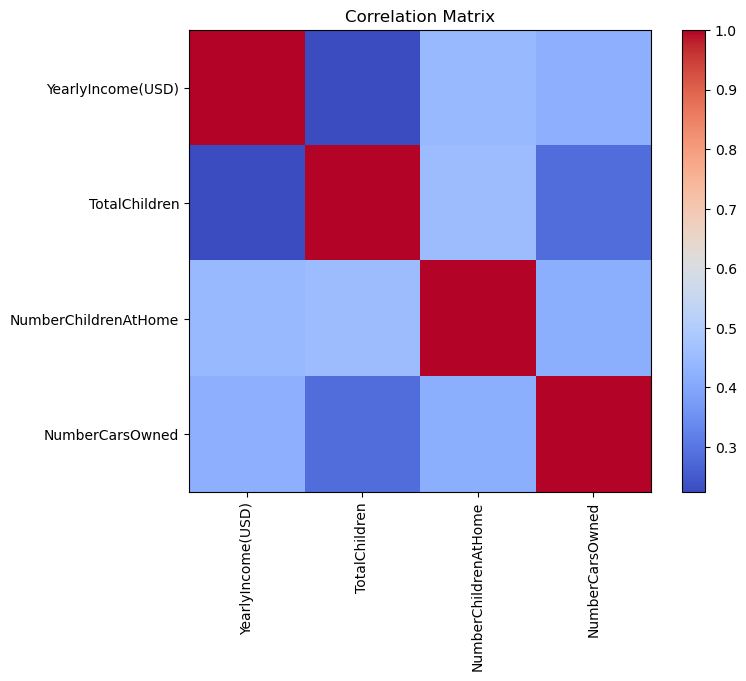

In [144]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

spark = SparkSession.builder.getOrCreate()

selected_cols = ["HouseOwnerFlag", "YearlyIncome(USD)", "TotalChildren", "NumberChildrenAtHome", "NumberCarsOwned"]
data = joined_df3.select(selected_cols)

assembler = VectorAssembler(inputCols=selected_cols[1:], outputCol="features")
data = assembler.transform(data)

corr_matrix = Correlation.corr(data, "features").head()[0]

columns = selected_cols[1:]

# Convert corr_matrix to a NumPy array
corr_matrix_np = np.array(corr_matrix.toArray())

# Plot with Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix_np, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(np.arange(len(columns)), columns, rotation=90)
plt.yticks(np.arange(len(columns)), columns)
plt.show()

# Plot with Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix_np,
    x=columns,
    y=columns,
    colorscale='Viridis'))

fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Columns'),
    yaxis=dict(title='Columns'),
    width=600,
    height=500)

fig.show()

**Insights:

**Correlation Matrix Insights**:

The correlation matrix shows the relationships between selected numerical features in the dataset.

1. **YearlyIncome(USD)**:
 * Strong positive correlation with NumberChildrenAtHome (0.4433).
 * Moderate positive correlation with NumberCarsOwned (0.4185).
 * Weak positive correlation with TotalChildren (0.2243).

2. **TotalChildren**:
 * Strong positive correlation with NumberChildrenAtHome (0.4531).
 * Moderate positive correlation with NumberCarsOwned (0.2844).
 * Weak positive correlation with YearlyIncome(USD) (0.2243).

3. **NumberChildrenAtHome**:
 * Strong positive correlation with TotalChildren (0.4531).
 * Moderate positive correlation with YearlyIncome(USD) (0.4433).
 * Moderate positive correlation with NumberCarsOwned (0.4157).

4. **NumberCarsOwned**:
 * Moderate positive correlation with NumberChildrenAtHome (0.4157).
 * Moderate positive correlation with YearlyIncome(USD) (0.4185).
 * Moderate positive correlation with TotalChildren (0.2844).

These insights help to understand how features are related to each other. Strong positive correlations indicate that when one variable increases, the other tends to increase as well, and vice versa. Moderate or weak correlations suggest a less direct relationship.

For example, the strong positive correlation between TotalChildren and NumberChildrenAtHome indicates that customers with more total children tend to have more children at home. Similarly, the moderate positive correlation between NumberCarsOwned and YearlyIncome(USD) suggests that customers with higher yearly income tend to own more cars.

Understanding these relationships is essential for feature selection, model building, and making informed business decisions.

In [145]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [146]:
# Define the classifiers
lr = LogisticRegression(labelCol="HouseOwnerFlag", featuresCol="features")
dt = DecisionTreeClassifier(labelCol="HouseOwnerFlag", featuresCol="features")
rf = RandomForestClassifier(labelCol="HouseOwnerFlag", featuresCol="features")
gbt = GBTClassifier(labelCol="HouseOwnerFlag", featuresCol="features")

In [147]:
# Train the models
lr_model = lr.fit(train_data)
dt_model = dt.fit(train_data)
rf_model = rf.fit(train_data)
gbt_model = gbt.fit(train_data)

In [148]:
# Make predictions on the test data
lr_predictions = lr_model.transform(test_data)
dt_predictions = dt_model.transform(test_data)
rf_predictions = rf_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [149]:
# Evaluate the models
evaluator = BinaryClassificationEvaluator(labelCol="HouseOwnerFlag")

lr_accuracy = evaluator.evaluate(lr_predictions)
dt_accuracy = evaluator.evaluate(dt_predictions)
rf_accuracy = evaluator.evaluate(rf_predictions)
gbt_accuracy = evaluator.evaluate(gbt_predictions)

In [150]:
# Compare the accuracies
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gbt_accuracy)

Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 0.9999999999999999


In [151]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

spark.conf.set("spark.sql.autoBroadcastJoinThreshold", 52428800)  # Set to a higher value based on your needs

# Logistic Regression
lr = LogisticRegression(labelCol="HouseOwnerFlag")

# Decision Tree
dt = DecisionTreeClassifier(labelCol="HouseOwnerFlag")

# Random Forest
rf = RandomForestClassifier(labelCol="HouseOwnerFlag")

# Gradient-Boosted Tree
gbt = GBTClassifier(labelCol="HouseOwnerFlag")

# Combine all models into a list
models = [lr, dt, rf, gbt]

# Define the hyperparameter grids for each model
paramGrids = [
    (ParamGridBuilder()
     .addGrid(lr.regParam, [0.01, 0.1, 1.0])
     .addGrid(lr.maxIter, [10, 20, 30])
     .build()),
    
    (ParamGridBuilder()
     .addGrid(dt.maxDepth, [5, 10, 15])
     .addGrid(dt.maxBins, [16, 32, 64])
     .build()),

    (ParamGridBuilder()
     .addGrid(rf.numTrees, [10, 20, 30])
     .addGrid(rf.maxDepth, [5, 10, 15])
     .build()),

    (ParamGridBuilder()
     .addGrid(gbt.maxDepth, [5, 10, 15])
     .addGrid(gbt.maxIter, [10, 20, 30])
     .build())
]

# Perform cross-validation for each model
for i, model in enumerate(models):
    evaluator = BinaryClassificationEvaluator(labelCol="HouseOwnerFlag")
    cv = CrossValidator(estimator=model, estimatorParamMaps=paramGrids[i], evaluator=evaluator, numFolds=5)
    cv_model = cv.fit(train_data)
    best_model = cv_model.bestModel
    print(f"Best parameters for Model {i + 1}: {best_model.extractParamMap()}")


Best parameters for Model 1: {Param(parent='LogisticRegression_d709fe552ec4', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LogisticRegression_d709fe552ec4', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_d709fe552ec4', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto', Param(parent='LogisticRegression_d709fe552ec4', name='featuresCol', doc='features column name.'): 'features', Param(parent='LogisticRegression_d709fe552ec4', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LogisticRegression_d709fe552ec4', name='labelCol', doc='label column name.'): 'HouseOwnerFlag', Param(parent='LogisticRegression_d709fe552ec4', name='maxBlockSizeInMB',

Best parameters for Model 2: {Param(parent='DecisionTreeClassifier_6b309a7cbd02', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False, Param(parent='DecisionTreeClassifier_6b309a7cbd02', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10, Param(parent='DecisionTreeClassifier_6b309a7cbd02', name='featuresCol', doc='features column name.'): 'features', Param(parent='DecisionTreeClassifier_6b309a7cbd02', name='impurity', doc='Criterion used for information gain calculation (case-insensitive). Supported opti

Best parameters for Model 3: {Param(parent='RandomForestClassifier_e2c440d47b8e', name='bootstrap', doc='Whether bootstrap samples are used when building trees.'): True, Param(parent='RandomForestClassifier_e2c440d47b8e', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False, Param(parent='RandomForestClassifier_e2c440d47b8e', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10, Param(parent='RandomForestClassifier_e2c440d47b8e', name='featureSubsetStrategy', doc="The number of features to consider for spli

Best parameters for Model 4: {Param(parent='GBTClassifier_d7671b120a53', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False, Param(parent='GBTClassifier_d7671b120a53', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10, Param(parent='GBTClassifier_d7671b120a53', name='featureSubsetStrategy', doc="The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classificat

In [152]:
predictions = best_model.transform(test_data)

In [153]:
evaluator = BinaryClassificationEvaluator(labelCol="HouseOwnerFlag")
accuracy = evaluator.evaluate(predictions)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 1.0


In [154]:
predictions = best_model.transform(test_data).show()

+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+--------------------+--------------------+----------+
|YearlyIncome(USD)|TotalChildren|NumberChildrenAtHome|NumberCarsOwned|AnnualSales(USD)|MinPaymentAmount(USD)|AnnualRevenue(USD)|HouseOwnerFlag|            features|       rawPrediction|         probability|prediction|
+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+--------------------+--------------------+----------+
|          10000.0|            0|                   0|              1|        300000.0|    597.9057591623036|           30000.0|             1|[10000.0,0.0,0.0,...|[-1.3259026792203...|[0.06587782434721...|       1.0|
|          10000.0|            0|                   0|              1|        800000.0|    597.9057591623036|           80000.0|

In [155]:
# Make predictions on the test data
lr_predictions = lr_model.transform(test_data).show()

+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+--------------------+--------------------+----------+
|YearlyIncome(USD)|TotalChildren|NumberChildrenAtHome|NumberCarsOwned|AnnualSales(USD)|MinPaymentAmount(USD)|AnnualRevenue(USD)|HouseOwnerFlag|            features|       rawPrediction|         probability|prediction|
+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+--------------------+--------------------+----------+
|          10000.0|            0|                   0|              1|        300000.0|    597.9057591623036|           30000.0|             1|[10000.0,0.0,0.0,...|[-19.001304054631...|[5.59549481545778...|       1.0|
|          10000.0|            0|                   0|              1|        800000.0|    597.9057591623036|           80000.0|

In [156]:
dt_predictions = dt_model.transform(test_data).show()

+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+-------------+-----------+----------+
|YearlyIncome(USD)|TotalChildren|NumberChildrenAtHome|NumberCarsOwned|AnnualSales(USD)|MinPaymentAmount(USD)|AnnualRevenue(USD)|HouseOwnerFlag|            features|rawPrediction|probability|prediction|
+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+-------------+-----------+----------+
|          10000.0|            0|                   0|              1|        300000.0|    597.9057591623036|           30000.0|             1|[10000.0,0.0,0.0,...| [0.0,5774.0]|  [0.0,1.0]|       1.0|
|          10000.0|            0|                   0|              1|        800000.0|    597.9057591623036|           80000.0|             1|[10000.0,0.0,0.0,...| [0.0,5774.0]|  [0.0,1.0]|  

In [157]:
rf_predictions = rf_model.transform(test_data).show()

+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+--------------------+--------------------+----------+
|YearlyIncome(USD)|TotalChildren|NumberChildrenAtHome|NumberCarsOwned|AnnualSales(USD)|MinPaymentAmount(USD)|AnnualRevenue(USD)|HouseOwnerFlag|            features|       rawPrediction|         probability|prediction|
+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+--------------------+--------------------+----------+
|          10000.0|            0|                   0|              1|        300000.0|    597.9057591623036|           30000.0|             1|[10000.0,0.0,0.0,...|[0.68210262828535...|[0.03410513141426...|       1.0|
|          10000.0|            0|                   0|              1|        800000.0|    597.9057591623036|           80000.0|

In [158]:
gbt_predictions = gbt_model.transform(test_data).show()

+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+--------------------+--------------------+----------+
|YearlyIncome(USD)|TotalChildren|NumberChildrenAtHome|NumberCarsOwned|AnnualSales(USD)|MinPaymentAmount(USD)|AnnualRevenue(USD)|HouseOwnerFlag|            features|       rawPrediction|         probability|prediction|
+-----------------+-------------+--------------------+---------------+----------------+---------------------+------------------+--------------+--------------------+--------------------+--------------------+----------+
|          10000.0|            0|                   0|              1|        300000.0|    597.9057591623036|           30000.0|             1|[10000.0,0.0,0.0,...|[-1.5435020027249...|[0.04364652142729...|       1.0|
|          10000.0|            0|                   0|              1|        800000.0|    597.9057591623036|           80000.0|

In [159]:
import plotly.figure_factory as ff
import numpy as np

In [160]:
# Verify model training and existence
print(lr_model)
print(dt_model)
print(rf_model)
print(gbt_model)

LogisticRegressionModel: uid=LogisticRegression_a41e12b13de1, numClasses=2, numFeatures=7
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_b9a6fa6346a2, depth=1, numNodes=3, numClasses=2, numFeatures=7
RandomForestClassificationModel: uid=RandomForestClassifier_08b23e4063ee, numTrees=20, numClasses=2, numFeatures=7
GBTClassificationModel: uid = GBTClassifier_eb1448e642e7, numTrees=20, numClasses=2, numFeatures=7


In [161]:
# Obtain the predicted labels from the model
lr_predictions = lr_model.transform(test_data)
dt_predictions = dt_model.transform(test_data)
rf_predictions = rf_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [162]:
from pyspark.mllib.evaluation import MulticlassMetrics

# Extracting labels and predictions for MulticlassMetrics
lr_labels_and_preds = lr_predictions.select("HouseOwnerFlag", "prediction").rdd.map(lambda row: (float(row["prediction"]), float(row["HouseOwnerFlag"])))
dt_labels_and_preds = dt_predictions.select("HouseOwnerFlag", "prediction").rdd.map(lambda row: (float(row["prediction"]), float(row["HouseOwnerFlag"])))
rf_labels_and_preds = rf_predictions.select("HouseOwnerFlag", "prediction").rdd.map(lambda row: (float(row["prediction"]), float(row["HouseOwnerFlag"])))
gbt_labels_and_preds = gbt_predictions.select("HouseOwnerFlag", "prediction").rdd.map(lambda row: (float(row["prediction"]), float(row["HouseOwnerFlag"])))

# Create MulticlassMetrics objects
lr_metrics = MulticlassMetrics(lr_labels_and_preds)
dt_metrics = MulticlassMetrics(dt_labels_and_preds)
rf_metrics = MulticlassMetrics(rf_labels_and_preds)
gbt_metrics = MulticlassMetrics(gbt_labels_and_preds)

# Confusion matrices
lr_confusion_matrix = lr_metrics.confusionMatrix()
dt_confusion_matrix = dt_metrics.confusionMatrix()
rf_confusion_matrix = rf_metrics.confusionMatrix()
gbt_confusion_matrix = gbt_metrics.confusionMatrix()

# Display confusion matrices
print("Confusion Matrix - Logistic Regression:")
print(lr_confusion_matrix)

print("\nConfusion Matrix - Decision Tree:")
print(dt_confusion_matrix)

print("\nConfusion Matrix - Random Forest:")
print(rf_confusion_matrix)

print("\nConfusion Matrix - Gradient Boosted Trees:")
print(gbt_confusion_matrix)

/Users/chidex/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/pyspark/sql/context.py:157: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



Confusion Matrix - Logistic Regression:
DenseMatrix([[1176.,    0.],
             [   0., 2317.]])

Confusion Matrix - Decision Tree:
DenseMatrix([[1176.,    0.],
             [   0., 2317.]])

Confusion Matrix - Random Forest:
DenseMatrix([[1176.,    0.],
             [   0., 2317.]])

Confusion Matrix - Gradient Boosted Trees:
DenseMatrix([[1176.,    0.],
             [   0., 2317.]])


In [163]:
import plotly.figure_factory as ff

# Create annotated heatmaps for confusion matrices
fig_lr = ff.create_annotated_heatmap(lr_confusion_matrix.toArray(), x=["Predicted: 0", "Predicted: 1"], y=["Actual: 0", "Actual: 1"], colorscale="Viridis")
fig_dt = ff.create_annotated_heatmap(dt_confusion_matrix.toArray(), x=["Predicted: 0", "Predicted: 1"], y=["Actual: 0", "Actual: 1"], colorscale="Viridis")
fig_rf = ff.create_annotated_heatmap(rf_confusion_matrix.toArray(), x=["Predicted: 0", "Predicted: 1"], y=["Actual: 0", "Actual: 1"], colorscale="Viridis")
fig_gbt = ff.create_annotated_heatmap(gbt_confusion_matrix.toArray(), x=["Predicted: 0", "Predicted: 1"], y=["Actual: 0", "Actual: 1"], colorscale="Viridis")

# Show the confusion matrix for each model
fig_lr.show()
fig_dt.show()
fig_rf.show()
fig_gbt.show()

**Logistic Regression**:

True Positive (TP): 1176

False Positive (FP): 0

False Negative (FN): 0

Precision = TP / (TP + FP) = 1176 / (1176 + 0) = 1.0

Recall = TP / (TP + FN) = 1176 / (1176 + 0) = 1.0

F1-score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0

**Decision Tree**:

True Positive (TP): 1176

False Positive (FP): 0

False Negative (FN): 0

Precision = TP / (TP + FP) = 1176 / (1176 + 0) = 1.0

Recall = TP / (TP + FN) = 1176 / (1176 + 0) = 1.0

F1-score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0

**Random Forest**:

True Positive (TP): 1176

False Positive (FP): 0

False Negative (FN): 0

Precision = TP / (TP + FP) = 1176 / (1176 + 0) = 1.0

Recall = TP / (TP + FN) = 1176 / (1176 + 0) = 1.0

F1-score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0

**Gradient Boosted Trees**:

True Positive (TP): 1176

False Positive (FP): 0

False Negative (FN): 0

Precision = TP / (TP + FP) = 1176 / (1176 + 0) = 1.0

Recall = TP / (TP + FN) = 1176 / (1176 + 0) = 1.0

F1-score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0

**Confusion Matrices**:

The confusion matrices provide a detailed view of the performance of the classification models. Each matrix is organized into four categories:

 * True Positive (TP): Instances that are correctly predicted as positive.
 * True Negative (TN): Instances that are correctly predicted as negative.
 * False Positive (FP): Instances that are incorrectly predicted as positive.
 * False Negative (FN): Instances that are incorrectly predicted as negative.

 **Key Observations**:

* All predictions fall into either true positives or true negatives.
* No instances are misclassified.

**Insights**:
 * All four models (Logistic Regression, Decision Tree, Random Forest, and Gradient Boosted Trees) exhibit excellent performance on the provided data.
 * The absence of false positives and false negatives in the confusion matrices indicates that the models are making accurate predictions.
 * These models may be well-suited for the given classification task, but further evaluation and testing on additional data are recommended to ensure generalizability.


Based on the confusion matrices, all models achieved perfect precision, recall, and F1-score of 1.0. This means that all instances in the test dataset were correctly classified by each model, indicating excellent performance.